In [ ]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
paths = ["extendedDS"]

ds = pd.DataFrame()

for path in paths:
    for file_name in os.listdir(path):
        try:
            temp = pd.read_csv(path + "//" + file_name, index_col='dateandtime',parse_dates=True)
            ds = ds.append(temp)
        except:
            ...

    

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\1699952277.py:9: FutureWarning: The fr

In [5]:
ds.tail()

spdK/m          edge  vehDen
dateandtime                                         
2022-12-12 10:01:00  31.567421  -675093183#1     690
2022-12-12 10:01:00  48.207485   182371964#2     690
2022-12-12 10:01:00  41.764732    32659640#2     690
2022-12-12 10:01:00  48.852222   765656383#0     690
2022-12-12 10:01:00  55.326605    37099139#0     690

## LSTM on Every edge with Freq > 90%

In [6]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

In [19]:
temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '16T'  #one reading every 10 mins
                      )]
          ).mean()

In [20]:
temp

edge                 -178543139#2  -182371966#0  -182371966#4  -182371966#5  \
dateandtime                                                                   
2022-12-06 00:00:00           NaN           NaN           NaN           NaN   
2022-12-06 00:16:00           NaN           NaN           NaN     28.034380   
2022-12-06 00:32:00           NaN           NaN           NaN           NaN   
2022-12-06 00:48:00           NaN           NaN           NaN           NaN   
2022-12-06 01:04:00           NaN           NaN     46.397426           NaN   
...                           ...           ...           ...           ...   
2022-12-20 22:40:00     35.128506           NaN     42.289938     42.260171   
2022-12-20 22:56:00           NaN     43.336928     23.931795           NaN   
2022-12-20 23:12:00     48.994896     53.318098           NaN     43.861448   
2022-12-20 23:28:00     40.297550     45.539944           NaN     42.079136   
2022-12-20 23:44:00     48.232330           NaN           NaN     59.032482   

edge                 -182371968#5  -215628990#0  -215628990#1  -215628990#2  \
dateandtime                                                                   
2022-12-06 00:00:00           NaN           NaN           NaN     46.001526   
2022-12-06 00:16:00           NaN           NaN           NaN           NaN   
2022-12-06 00:32:00     51.048107           NaN     53.661565     50.355927   
2022-12-06 00:48:00           NaN           NaN           NaN     49.137622   
2022-12-06 01:04:00           NaN           NaN     45.168440           NaN   
...                           ...           ...           ...           ...   
2022-12-20 22:40:00           NaN           NaN     46.754271     49.576151   
2022-12-20 22:56:00           NaN           NaN     47.113703     50.652035   
2022-12-20 23:12:00     37.867871     50.596277     45.294676     44.241876   
2022-12-20 23:28:00           NaN           NaN     45.238868     39.833059   
2022-12-20 23:44:00     46.232260           NaN     48.470980     42.409406   

edge                 -215628990#3  -215628998#0  ...  958778139#0  \
dateandtime                                      ...                
2022-12-06 00:00:00           NaN           NaN  ...          NaN   
2022-12-06 00:16:00     48.353332     49.254459  ...          NaN   
2022-12-06 00:32:00           NaN           NaN  ...          NaN   
2022-12-06 00:48:00           NaN           NaN  ...          NaN   
2022-12-06 01:04:00           NaN           NaN  ...          NaN   
...                           ...           ...  ...          ...   
2022-12-20 22:40:00           NaN     24.323014  ...    55.535058   
2022-12-20 22:56:00           NaN           NaN  ...          NaN   
2022-12-20 23:12:00           NaN           NaN  ...          NaN   
2022-12-20 23:28:00           NaN     50.537367  ...    45.651611   
2022-12-20 23:44:00           NaN           NaN  ...          NaN   

edge                 958778139#0-AddedOnRampEdge  958778139#1  971350102#1  \
dateandtime                                                                  
2022-12-06 00:00:00                          NaN          NaN          NaN   
2022-12-06 00:16:00                    44.616810          NaN          NaN   
2022-12-06 00:32:00                          NaN          NaN    40.428775   
2022-12-06 00:48:00                          NaN          NaN          NaN   
2022-12-06 01:04:00                          NaN          NaN          NaN   
...                                          ...          ...          ...   
2022-12-20 22:40:00                    42.677849    46.673834    45.180725   
2022-12-20 22:56:00                    46.100435          NaN    40.532296   
2022-12-20 23:12:00                    45.746527          NaN    50.748310   
2022-12-20 23:28:00                    45.027230          NaN          NaN   
2022-12-20 23:44:00                     0.000000          NaN          NaN   

edge                 :793793078

In [21]:
temp.count().sort_values(ascending=False)

edge
858935309        1350
858935302        1350
858935315        1348
700673538        1341
652130052        1339
                 ... 
894550197#3       829
37789107#3        827
:8771565273_2     770
25584589#2        764
51799432#2        739
Length: 407, dtype: int64

In [22]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                                              1014
-182371966#0                                               922
-182371966#4                                               942
-182371966#5                                               958
-182371968#5                                               896
                                                          ... 
:8700766893_2                                              881
:8771565273_2                                              770
:8771565283_0                                             1107
:cluster_317515083_7650321646_0                            877
:cluster_6572911074_6572911076_8074011433_8074011435_0     855
Length: 407, dtype: int64

In [23]:
#fillna with max insteadx

In [24]:
df = temp.fillna(temp.max())

In [25]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [26]:
# Compute the variance of each column in the dataframe
variances = df.var()

# Find the columns with variances greater than 100
high_variances = variances[variances > 100]

# Print the columns with variances greater than 100
print(high_variances)

edge
-182371966#0     242.034383
-182371966#4     141.235906
-182371968#5     374.462534
-215628998#0     105.343600
-26195753#0      174.288213
                    ...    
947628159#3      438.598582
947628159#4      484.584286
:7937930785_0    148.892102
:8771565273_2    272.629181
:8771565283_0    227.961963
Length: 85, dtype: float64


In [265]:
filtered_df = df.loc[:, high_variances.index]

In [266]:
filtered_df.shape

(1350, 85)

In [ ]:
#Smooth curve
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, 
                           mode='full'
                          )
    return y_smooth

In [262]:
smoothed_df = []
for cntrDf in range(0, filtered_df.shape[-1]):
    smoothed_df.append(smooth(filtered_df.values[:,cntrDf],30))

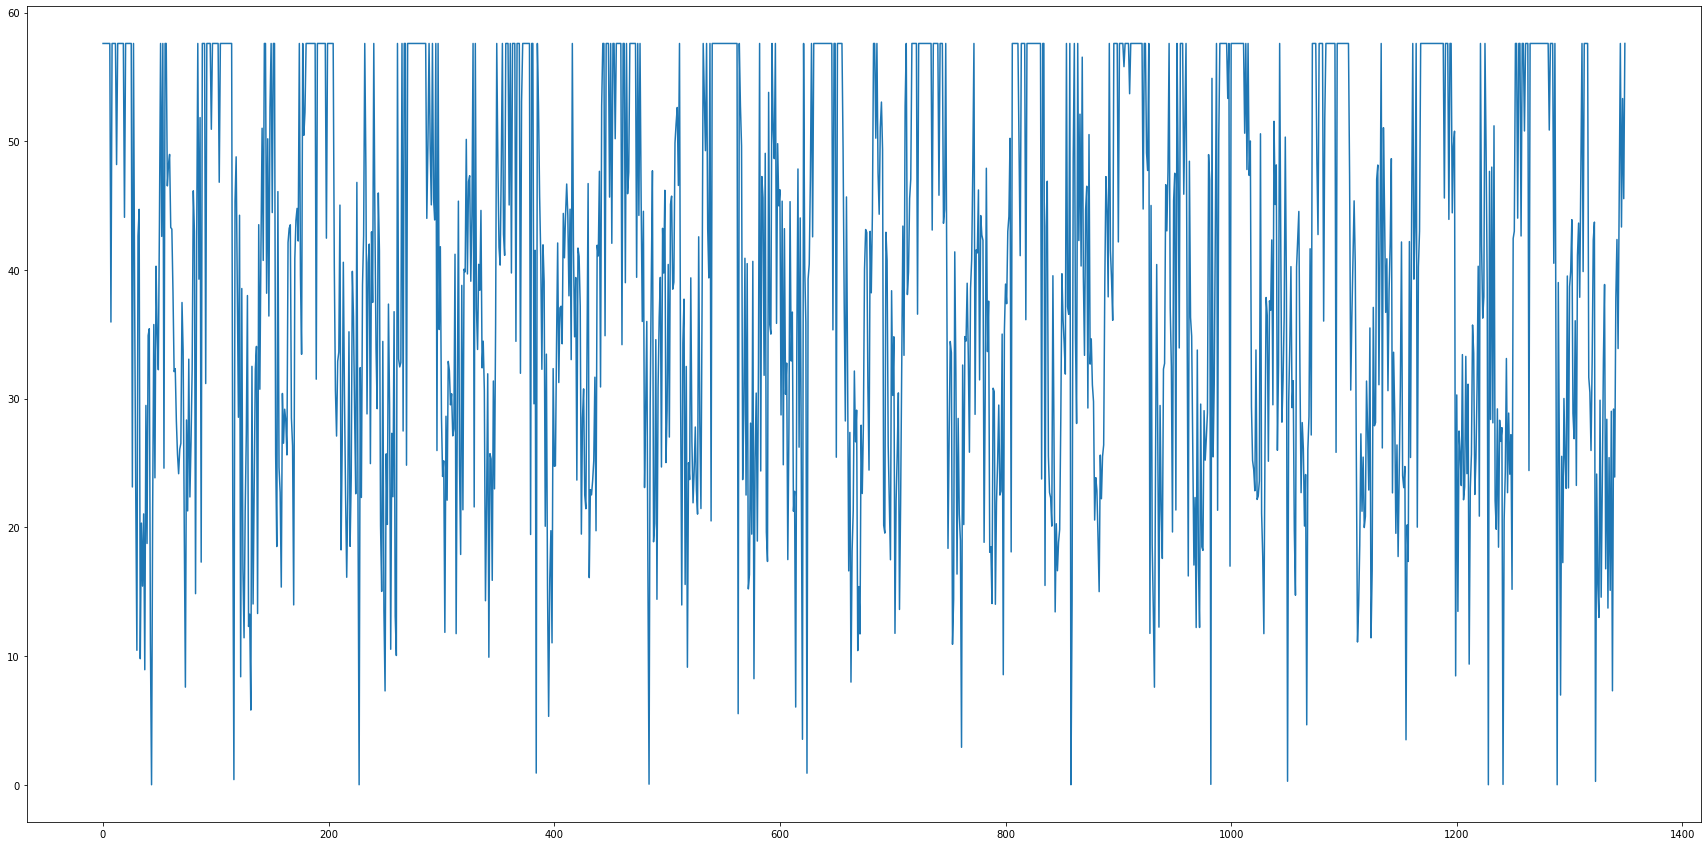

In [267]:
# plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
# plt.plot(smooth(df.values[:,0],30), 'b-', lw=1)
plt.plot(filtered_df.values[:,0])



In [32]:
import numpy as np


In [264]:
np.asarray(train).shape

(34, 1348)

In [49]:
filtered_df

edge                 -182371966#0  -182371966#4  -182371968#5  -215628998#0  \
dateandtime                                                                   
2022-12-06 00:00:00     57.599259     59.979756     62.246578     61.665565   
2022-12-06 00:16:00     57.599259     59.979756     62.246578     49.254459   
2022-12-06 00:32:00     57.599259     59.979756     51.048107     61.665565   
2022-12-06 00:48:00     57.599259     59.979756     62.246578     61.665565   
2022-12-06 01:04:00     57.599259     46.397426     62.246578     61.665565   
...                           ...           ...           ...           ...   
2022-12-20 22:40:00     57.599259     42.289938     62.246578     24.323014   
2022-12-20 22:56:00     43.336928     23.931795     62.246578     61.665565   
2022-12-20 23:12:00     53.318098     59.979756     37.867871     61.665565   
2022-12-20 23:28:00     45.539944     59.979756     62.246578     50.537367   
2022-12-20 23:44:00     57.599259     59.979756     46.232260     61.665565   

edge                 -26195753#0  -26202643#0  -26520995  -28581483  \
dateandtime                                                           
2022-12-06 00:00:00    62.868017    63.353342  59.641932  61.398072   
2022-12-06 00:16:00    15.597670    63.353342  59.641932  61.398072   
2022-12-06 00:32:00    62.868017    49.029556  59.641932  61.398072   
2022-12-06 00:48:00    62.868017    43.098479  59.641932  44.738253   
2022-12-06 01:04:00    14.810308    47.714883  59.641932  61.398072   
...                          ...          ...        ...        ...   
2022-12-20 22:40:00    53.002011    44.035238  51.030035  52.483531   
2022-12-20 22:56:00    17.084674    46.554721  52.112826  61.398072   
2022-12-20 23:12:00    62.868017    52.488805  59.641932  61.398072   
2022-12-20 23:28:00    62.868017    32.993094  49.954971  36.221435   
2022-12-20 23:44:00    40.583442    63.353342  59.641932  61.398072   

edge                 -28886503#7  -32659807#0  ...  885610137  886672185  \
dateandtime                                    ...                         
2022-12-06 00:00:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:16:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:32:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:48:00    59.172554    52.147863  ...  59.289330  61.403243   
2022-12-06 01:04:00    59.172554    61.278355  ...  59.289330  14.605453   
...                          ...          ...  ...        ...        ...   
2022-12-20 22:40:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-20 22:56:00    59.172554    41.989108  ...  59.289330  61.403243   
2022-12-20 23:12:00    44.553686    61.278355  ...  12.141011  25.687768   
2022-12-20 23:28:00    59.172554    40.858570  ...  59.289330  61.403243   
2022-12-20 23:44:00    46.754377    61.278355  ...  59.289330  61.403243   

edge                 888807595#5  890774197#2  940974901#1  947628159#3  \
dateandtime                                                               
2022-12-06 00:00:00    61.390215    59.154911     62.43427    48.850309   
2022-12-06 00:16:00    61.390215    59.154911     62.43427    48.850309   
2022-12-06 00:32:00    61.390215    59.154911     62.43427    48.850309   
2022-12-06 00:48:00    61.390215    59.154911     62.43427    48.850309   
2022-12-06 01:04:00    61.390215    59.154911     62.43427    48.850309   
...                          ...          ...          ...          ...   
2022-12-20 22:40:00    61.390215    59.154911     62.43427    48.850309   
2022-12-20 22:56:00    30.715658    59.154911     62.43427    48.850309   
2022-12-20 23:12:00    61.390215    59.154911     62.43427    28.118222   
2022-12-20 23:28:00    61.390215    59.154911     62.43427    48.850309   
2022-12-20 23:44:00    61.390215    59.154911     62.43427    48.850309   

edge                 947628159#4  :7937930785_0  :8771565273_2  :8771565283_0  
dat

In [268]:
np.asarray(filtered_df[:2000]).shape 

(1350, 85)

In [350]:
def train_test_split(dataset, ratio):
    
    train_size = int(len(dataset) * ratio)
    test_size = len(dataset) - train_size

    train  = dataset[0:train_size]
    test   = dataset[train_size:]
    return train,test

In [291]:
train,test = train_test_split(filtered_df,0.7)

In [341]:
train

edge                 -182371966#0  -182371966#4  -182371968#5  -215628998#0  \
dateandtime                                                                   
2022-12-06 00:00:00     57.599259     59.979756     62.246578     61.665565   
2022-12-06 00:16:00     57.599259     59.979756     62.246578     49.254459   
2022-12-06 00:32:00     57.599259     59.979756     51.048107     61.665565   
2022-12-06 00:48:00     57.599259     59.979756     62.246578     61.665565   
2022-12-06 01:04:00     57.599259     46.397426     62.246578     61.665565   
...                           ...           ...           ...           ...   
2022-12-10 21:20:00     47.664954     47.492712     30.044647     45.264163   
2022-12-10 21:36:00     30.907274     49.455216     49.273483     45.482425   
2022-12-10 21:52:00     52.776208     41.631483     29.651330     28.952131   
2022-12-10 22:08:00     57.599259     59.979756     45.757130      0.000000   
2022-12-10 22:24:00     57.599259     59.979756     45.240752     45.621066   

edge                 -26195753#0  -26202643#0  -26520995  -28581483  \
dateandtime                                                           
2022-12-06 00:00:00    62.868017    63.353342  59.641932  61.398072   
2022-12-06 00:16:00    15.597670    63.353342  59.641932  61.398072   
2022-12-06 00:32:00    62.868017    49.029556  59.641932  61.398072   
2022-12-06 00:48:00    62.868017    43.098479  59.641932  44.738253   
2022-12-06 01:04:00    14.810308    47.714883  59.641932  61.398072   
...                          ...          ...        ...        ...   
2022-12-10 21:20:00    49.672602    42.054656  47.068129  34.406652   
2022-12-10 21:36:00    46.461151    52.095305  57.632871  48.292135   
2022-12-10 21:52:00    55.564639    63.353342  46.372973  50.961617   
2022-12-10 22:08:00    32.025636    45.301228  41.731213  61.398072   
2022-12-10 22:24:00    49.826463    31.843797  59.641932   7.712259   

edge                 -28886503#7  -32659807#0  ...  885610137  886672185  \
dateandtime                                    ...                         
2022-12-06 00:00:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:16:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:32:00    59.172554    61.278355  ...  59.289330  61.403243   
2022-12-06 00:48:00    59.172554    52.147863  ...  59.289330  61.403243   
2022-12-06 01:04:00    59.172554    61.278355  ...  59.289330  14.605453   
...                          ...          ...  ...        ...        ...   
2022-12-10 21:20:00    48.878818    42.292554  ...  50.488573  35.157413   
2022-12-10 21:36:00    43.471520    37.363193  ...  42.531942  24.930402   
2022-12-10 21:52:00    52.412232    29.407477  ...  59.289330  40.876375   
2022-12-10 22:08:00    59.172554    47.042335  ...  36.955551  61.403243   
2022-12-10 22:24:00    49.849536    39.234788  ...  59.289330  61.403243   

edge                 888807595#5  890774197#2  940974901#1  947628159#3  \
dateandtime                                                               
2022-12-06 00:00:00    61.390215    59.154911    62.434270    48.850309   
2022-12-06 00:16:00    61.390215    59.154911    62.434270    48.850309   
2022-12-06 00:32:00    61.390215    59.154911    62.434270    48.850309   
2022-12-06 00:48:00    61.390215    59.154911    62.434270    48.850309   
2022-12-06 01:04:00    61.390215    59.154911    62.434270    48.850309   
...                          ...          ...          ...          ...   
2022-12-10 21:20:00    37.749472    51.600313    43.320762     0.902958   
2022-12-10 21:36:00    61.390215    16.314712    53.932157     1.580074   
2022-12-10 21:52:00    28.652519    59.154911    51.512940     1.441247   
2022-12-10 22:08:00    48.946760    45.636873    43.917842    41.133814   
2022-12-10 22:24:00    33.162350    59.154911    62.434270    48.155837   

edge                 947628159#4  :7937930785_0  :8771565273_2  :8771565283_0  
dat

In [55]:
test[0]

array([58.90236792, 58.90236792, 58.90236792, ..., 51.80011324,
       54.82650565, 58.90236792])

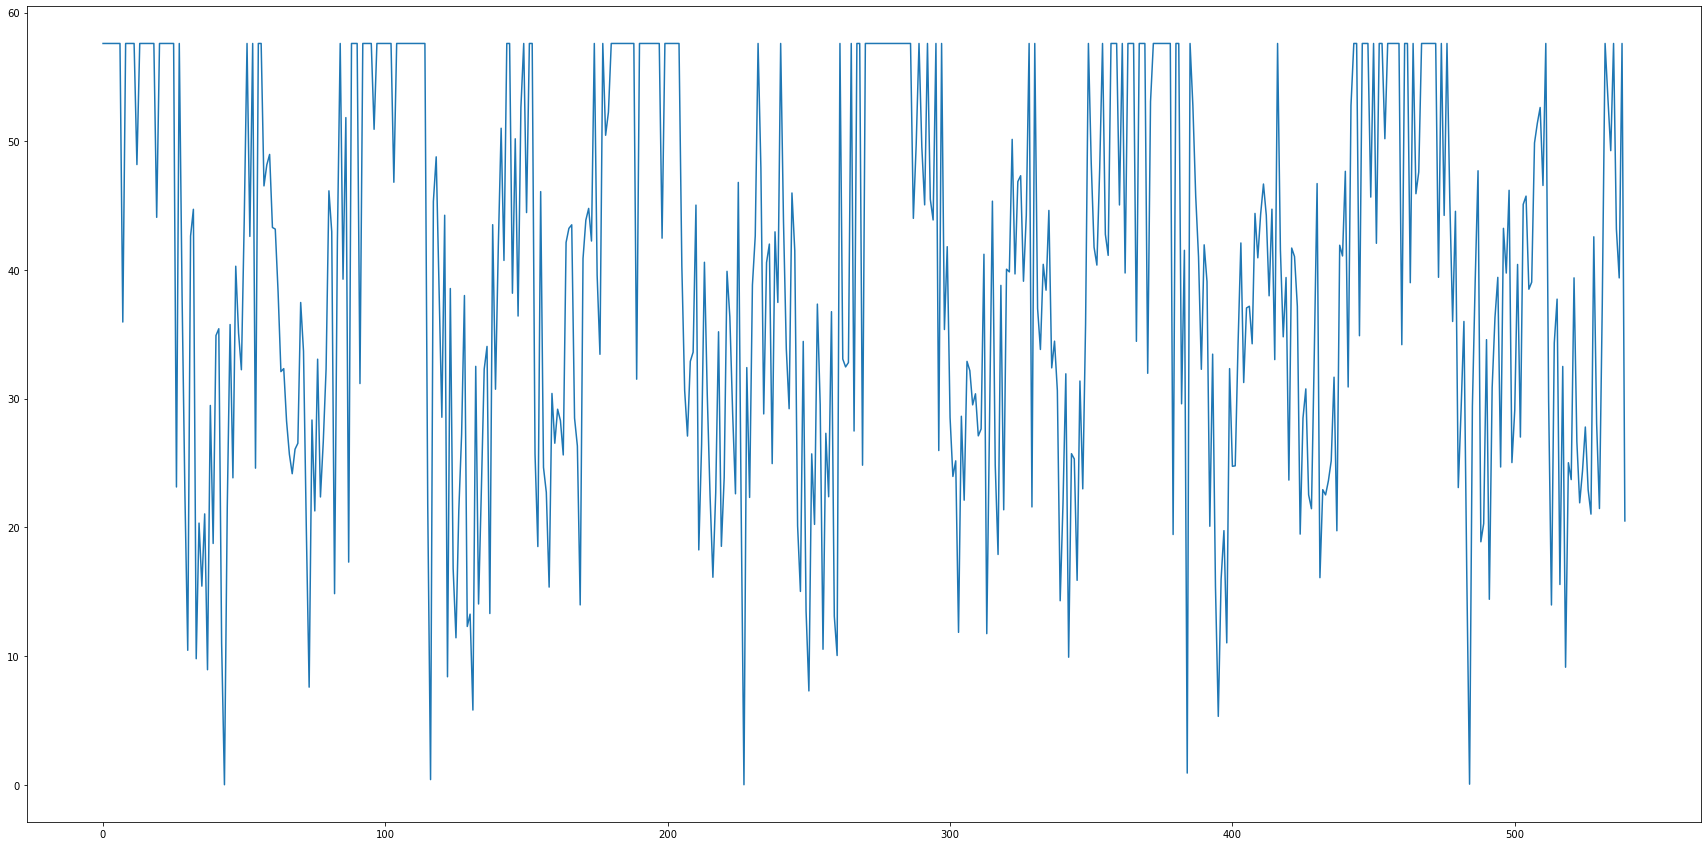

In [271]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(df.values[:,1])
plt.plot(train.values[:,0])
plt.show()

In [351]:
from keras.preprocessing.sequence import TimeseriesGenerator

# How many record to take into account
lookback = 10 #60mins
n_features = train.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(train.values, train.values,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test.values, test.values,
                                    length=lookback, 
                                    batch_size=batch_size)

In [354]:
def create_model(lookback,train,val,test):
    # How many record to take into account
    # lookback = 10 #60mins
    n_features = train.shape[-1]
    batch_size = 1
    train_gen = TimeseriesGenerator(train.values, train.values,
                                    length=lookback, 
                                    batch_size=batch_size)

    val_gen = TimeseriesGenerator(val.values, val.values,
                                        length=lookback, 
                                        batch_size=batch_size)
    
    test_gen = TimeseriesGenerator(test.values, test.values,
                                        length=lookback, 
                                        batch_size=batch_size)
    
    model = Sequential()
    model.add(LSTM(500, return_sequences=True, activation='relu', input_shape=(lookback, train.shape[-1]))) 
    # model.add(LSTM(100, return_sequences=False, activation='sigmoid', input_shape=(lookback, train.shape[-1]))) 
    model.add(Dense(train.shape[-1]))
    model.compile(optimizer='adam', loss='mse')
    
    return train_gen, val_gen, test_gen, model

In [360]:
def plot_graphs(actual,predicted,lookback, index):
    plt.rcParams["figure.figsize"] = (30,15)
    plt.plot(actual.values[lookback:,index])

    plt.plot(predicted[:,0,index],lw=1)
    #plt.legend(['actual data','Predicted data'],loc='best')
    # plt.xlim([0, 700])
    plt.show()

In [356]:
models =[]
mse_values = []

def train_model_lookback(lb_start,lb_end,train,val,test):

    for lookback in range(lb_start,lb_end):
        
        train_gen, val_gen, test_gen, model = create_model(lookback,train,val,test)
        
        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

        model.fit(train_gen,epochs=200, 
                  validation_data=val_gen,
                  callbacks=callback
                  )
        
        models.append(model)
        
        mse = model.evaluate_generator(test_gen)
        
        mse_values.append(mse)
        trainPredict = model.predict_generator(train_gen)
        valPredict = model.predict_generator(val_gen)
        testPredict = model.predict_generator(test_gen)
        
        print("lookback = " , lookback , "mse = ", mse)
        try:
            plot_graphs(train,trainPredict,lookback, 0)
            plot_graphs(val,valPredict,lookback, 0)
            plot_graphs(test,testPredict,lookback, 0)
        except:
            ...
    return models, mse_values

Epoch 1/200
439/439 [==============================] - 21s 44ms/step - loss: 175.6679 - val_loss: 134.3303
Epoch 2/200
439/439 [==============================] - 20s 45ms/step - loss: 124.9143 - val_loss: 116.4862
Epoch 3/200
439/439 [==============================] - 19s 44ms/step - loss: 120.5810 - val_loss: 117.9917
Epoch 4/200
439/439 [==============================] - 19s 44ms/step - loss: 118.4902 - val_loss: 110.7454
Epoch 5/200
439/439 [==============================] - 19s 43ms/step - loss: 114.6105 - val_loss: 112.7698
Epoch 6/200
439/439 [==============================] - 19s 44ms/step - loss: 114.2207 - val_loss: 111.1976
Epoch 7/200
439/439 [==============================] - 20s 45ms/step - loss: 113.3608 - val_loss: 110.9563
Epoch 8/200
439/439 [==============================] - 18s 40ms/step - loss: 112.1234 - val_loss: 107.9784
Epoch 9/200
439/439 [==============================] - 20s 45ms/step - loss: 112.5756 - val_loss: 109.7780
Epoch 10/200
439/439 [===============

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mse = model.evaluate_generator(test_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valPredict = model.predict_generator(val_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, wh

lookback =  6 mse =  116.5672836303711


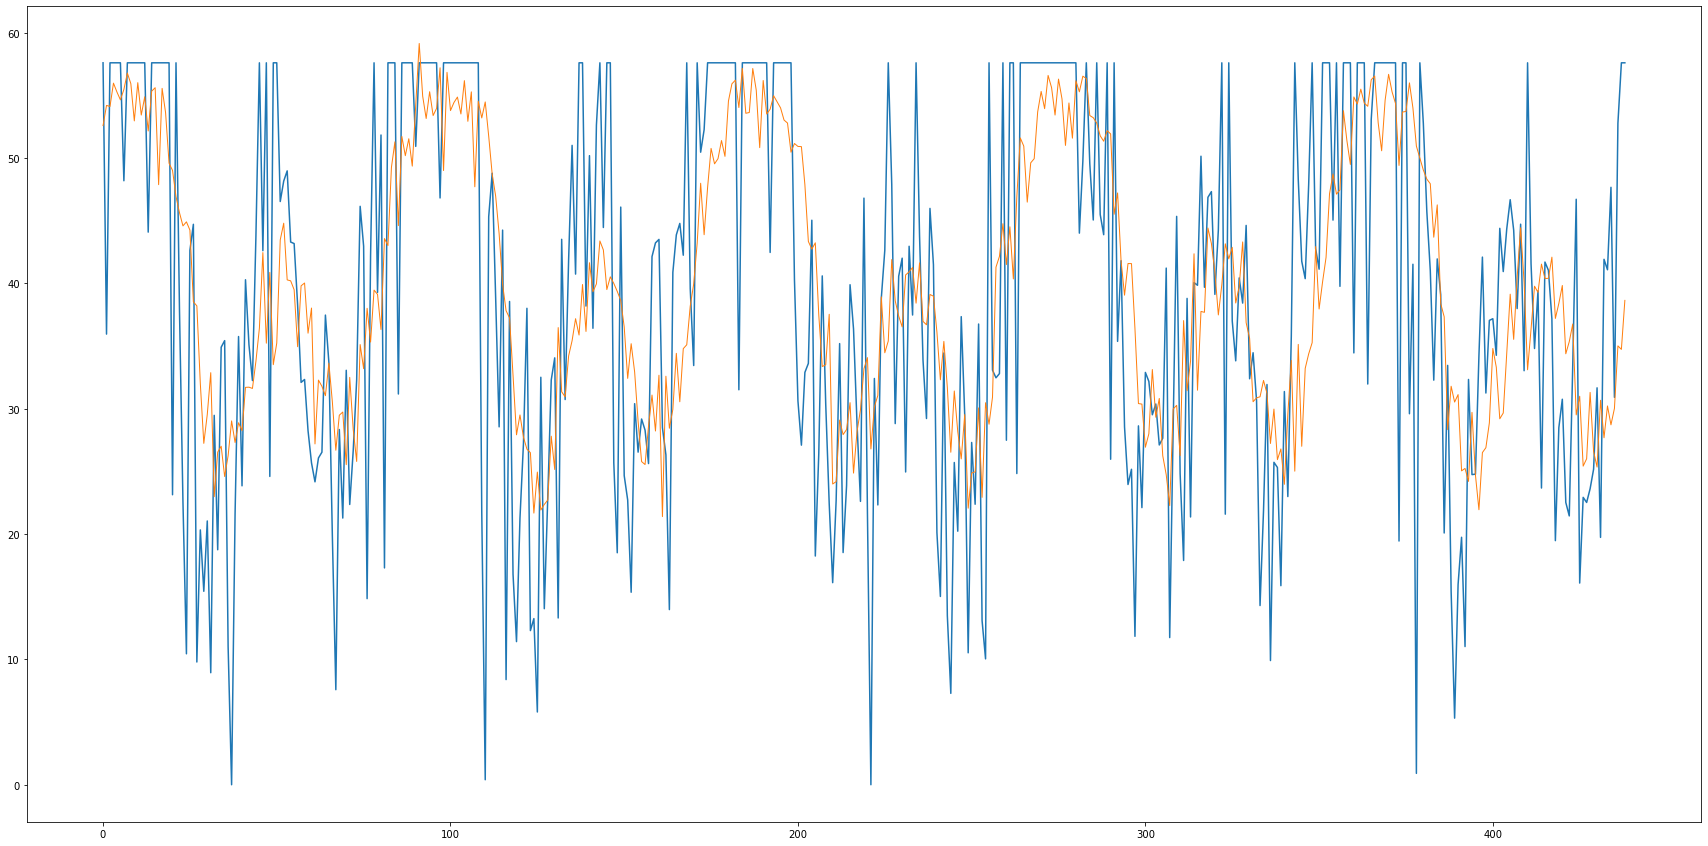

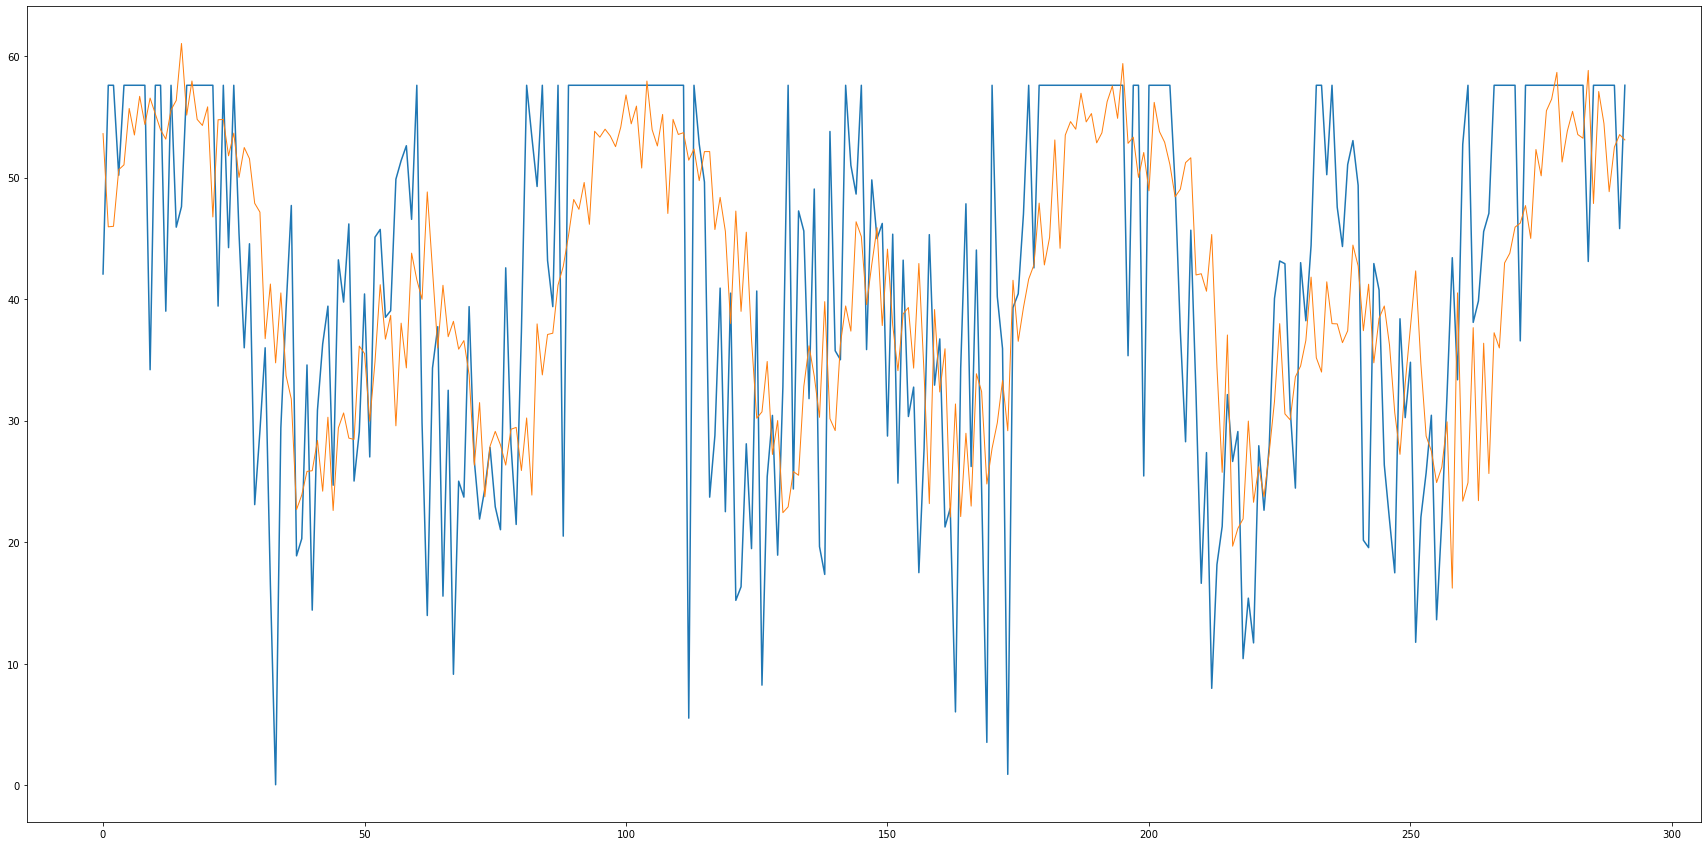

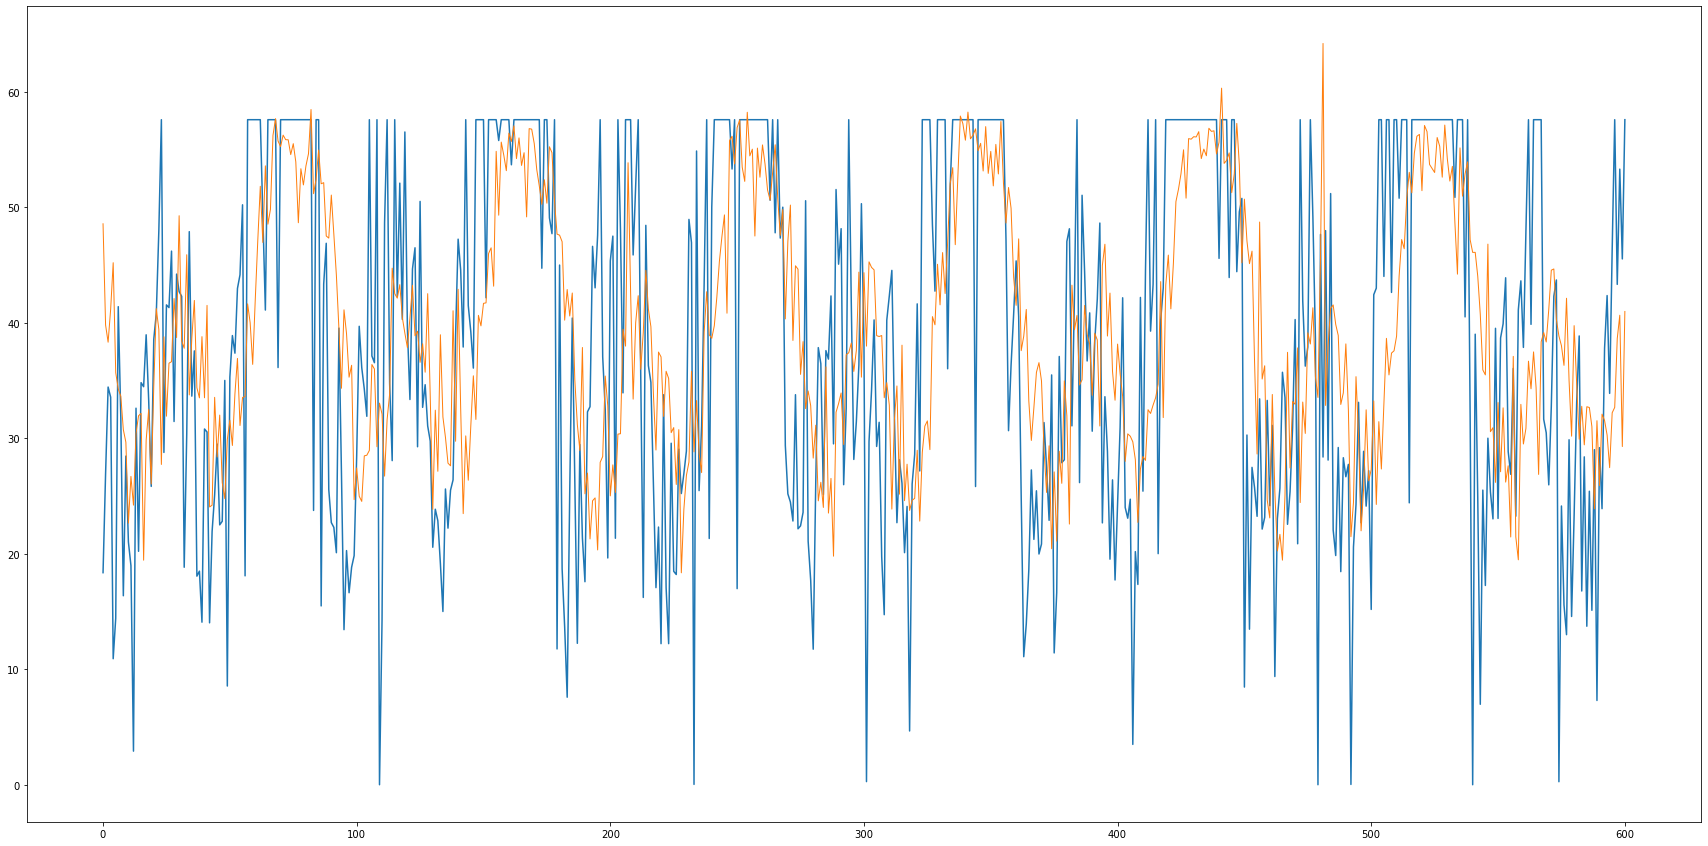

Epoch 1/200
438/438 [==============================] - 19s 40ms/step - loss: 171.0322 - val_loss: 129.5436
Epoch 2/200
438/438 [==============================] - 17s 39ms/step - loss: 127.5175 - val_loss: 144.3167
Epoch 3/200
438/438 [==============================] - 17s 39ms/step - loss: 124.6276 - val_loss: 117.3404
Epoch 4/200
438/438 [==============================] - 17s 38ms/step - loss: 122.4982 - val_loss: 118.6415
Epoch 5/200
438/438 [==============================] - 17s 39ms/step - loss: 119.9200 - val_loss: 115.1733
Epoch 6/200
438/438 [==============================] - 17s 40ms/step - loss: 117.5901 - val_loss: 122.4007
Epoch 7/200
438/438 [==============================] - 17s 38ms/step - loss: 116.8215 - val_loss: 115.5458
Epoch 8/200
438/438 [==============================] - 18s 41ms/step - loss: 116.1298 - val_loss: 114.0368
Epoch 9/200
438/438 [==============================] - 17s 39ms/step - loss: 115.5666 - val_loss: 113.8914
Epoch 10/200
438/438 [===============

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mse = model.evaluate_generator(test_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valPredict = model.predict_generator(val_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, wh

lookback =  7 mse =  121.95894622802734


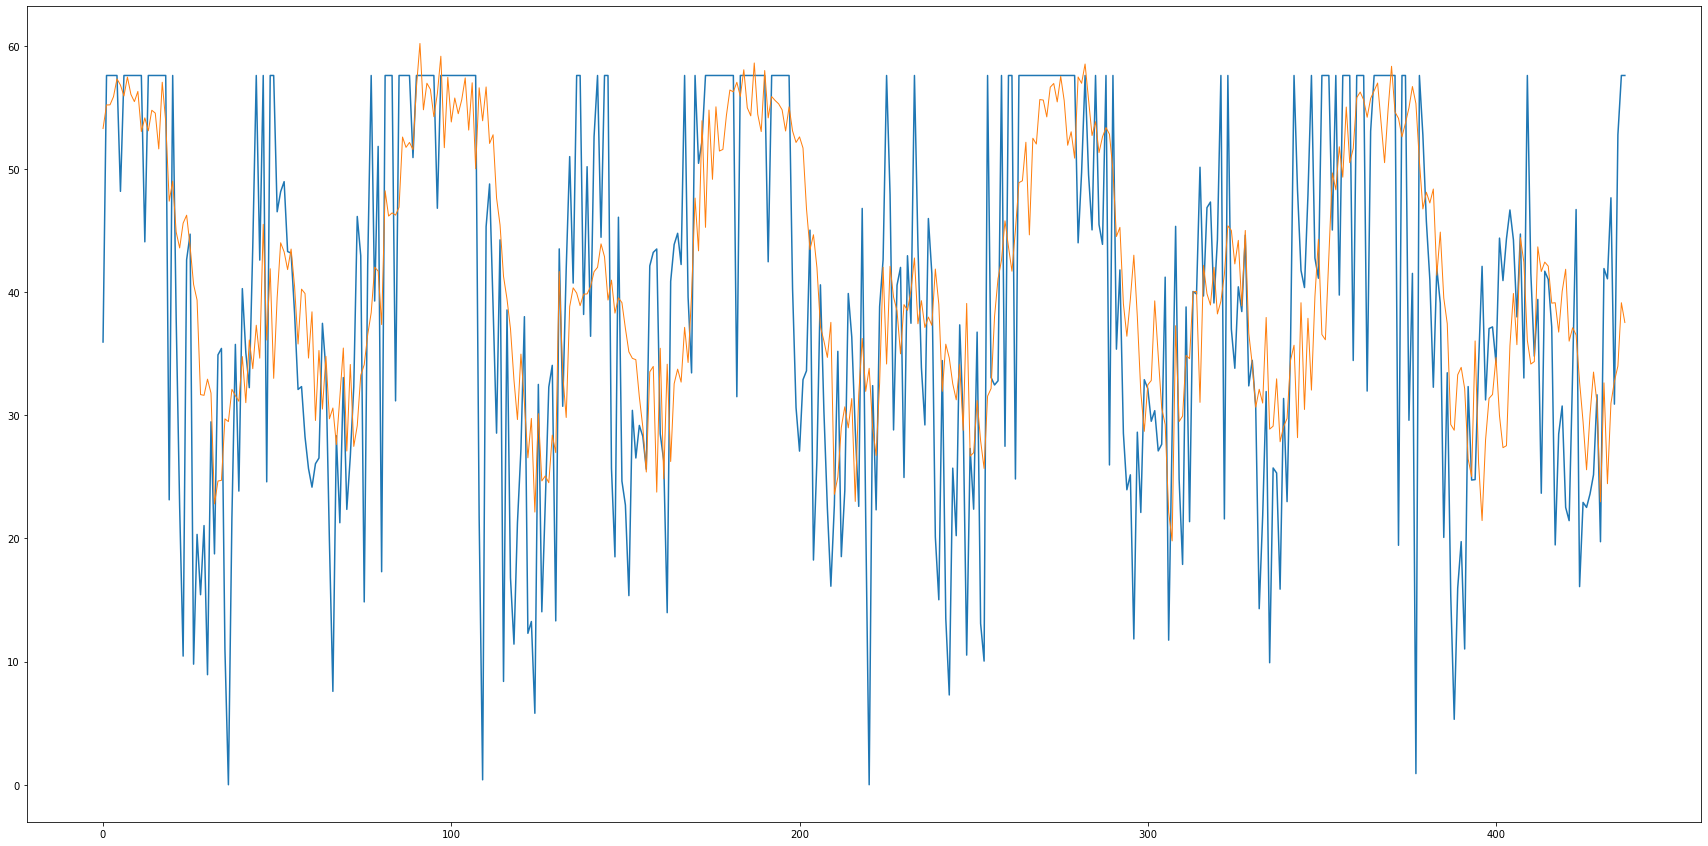

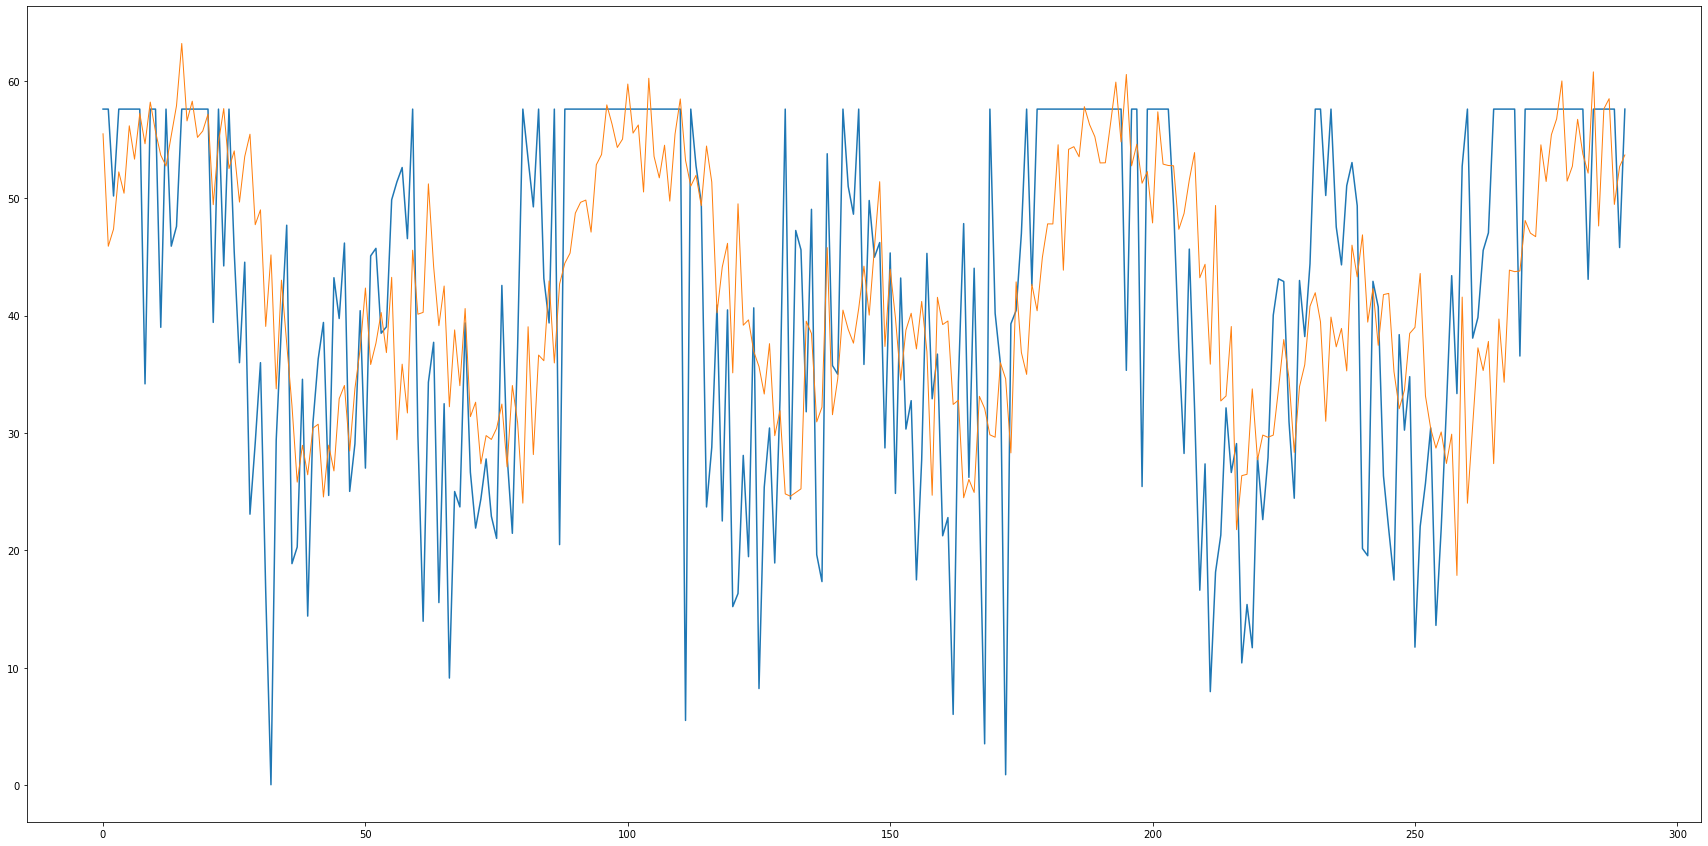

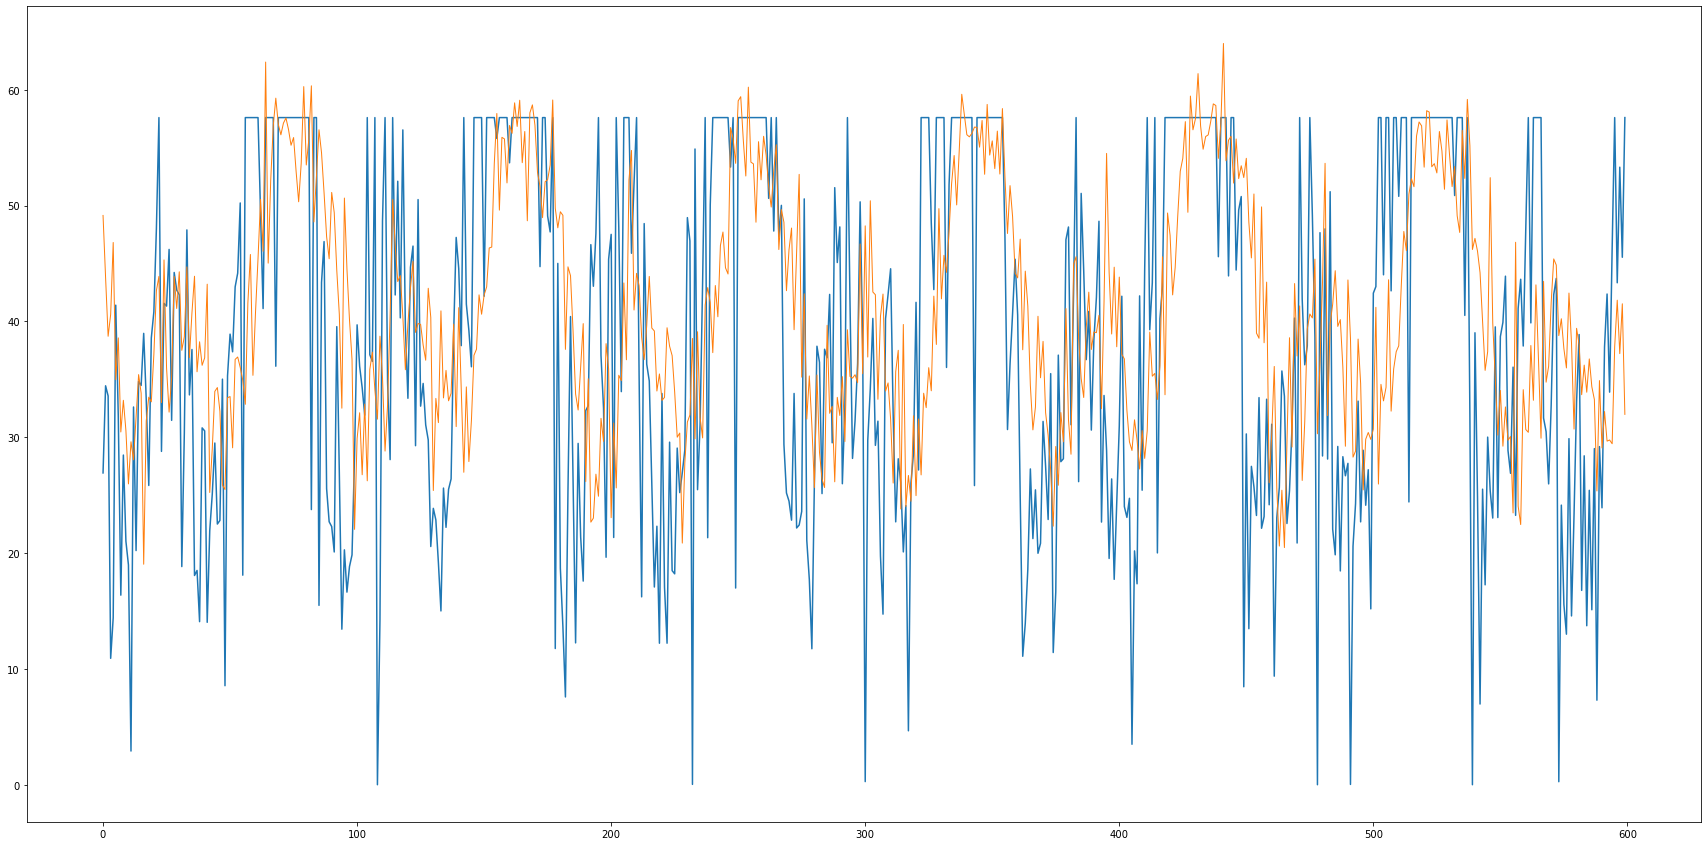

Epoch 1/200
437/437 [==============================] - 20s 42ms/step - loss: 186.0696 - val_loss: 133.7140
Epoch 2/200
437/437 [==============================] - 18s 41ms/step - loss: 133.2614 - val_loss: 131.4512
Epoch 3/200
437/437 [==============================] - 17s 39ms/step - loss: 127.7250 - val_loss: 144.8968
Epoch 4/200
437/437 [==============================] - 18s 42ms/step - loss: 127.3208 - val_loss: 125.8460
Epoch 5/200
437/437 [==============================] - 17s 40ms/step - loss: 122.9476 - val_loss: 117.9384
Epoch 6/200
437/437 [==============================] - 18s 41ms/step - loss: 123.4281 - val_loss: 118.0402
Epoch 7/200
437/437 [==============================] - 18s 41ms/step - loss: 121.5270 - val_loss: 117.2518
Epoch 8/200
437/437 [==============================] - 18s 41ms/step - loss: 122.1763 - val_loss: 121.8068
Epoch 9/200
437/437 [==============================] - 17s 39ms/step - loss: 120.6150 - val_loss: 119.9715
Epoch 10/200
437/437 [===============

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mse = model.evaluate_generator(test_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valPredict = model.predict_generator(val_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, wh

lookback =  8 mse =  128.59046936035156


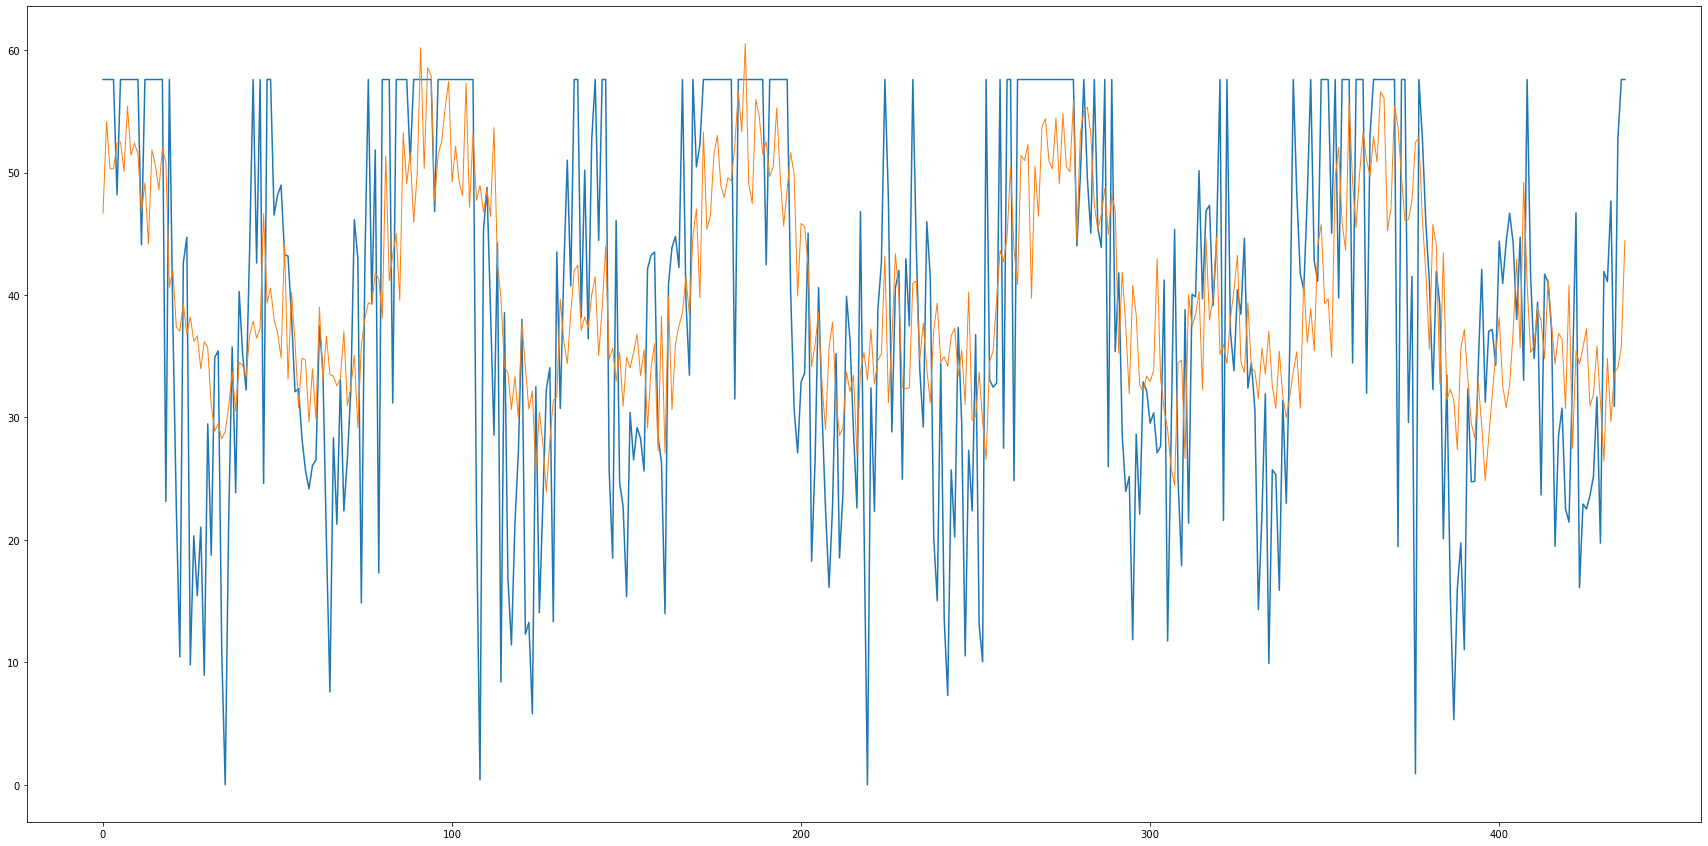

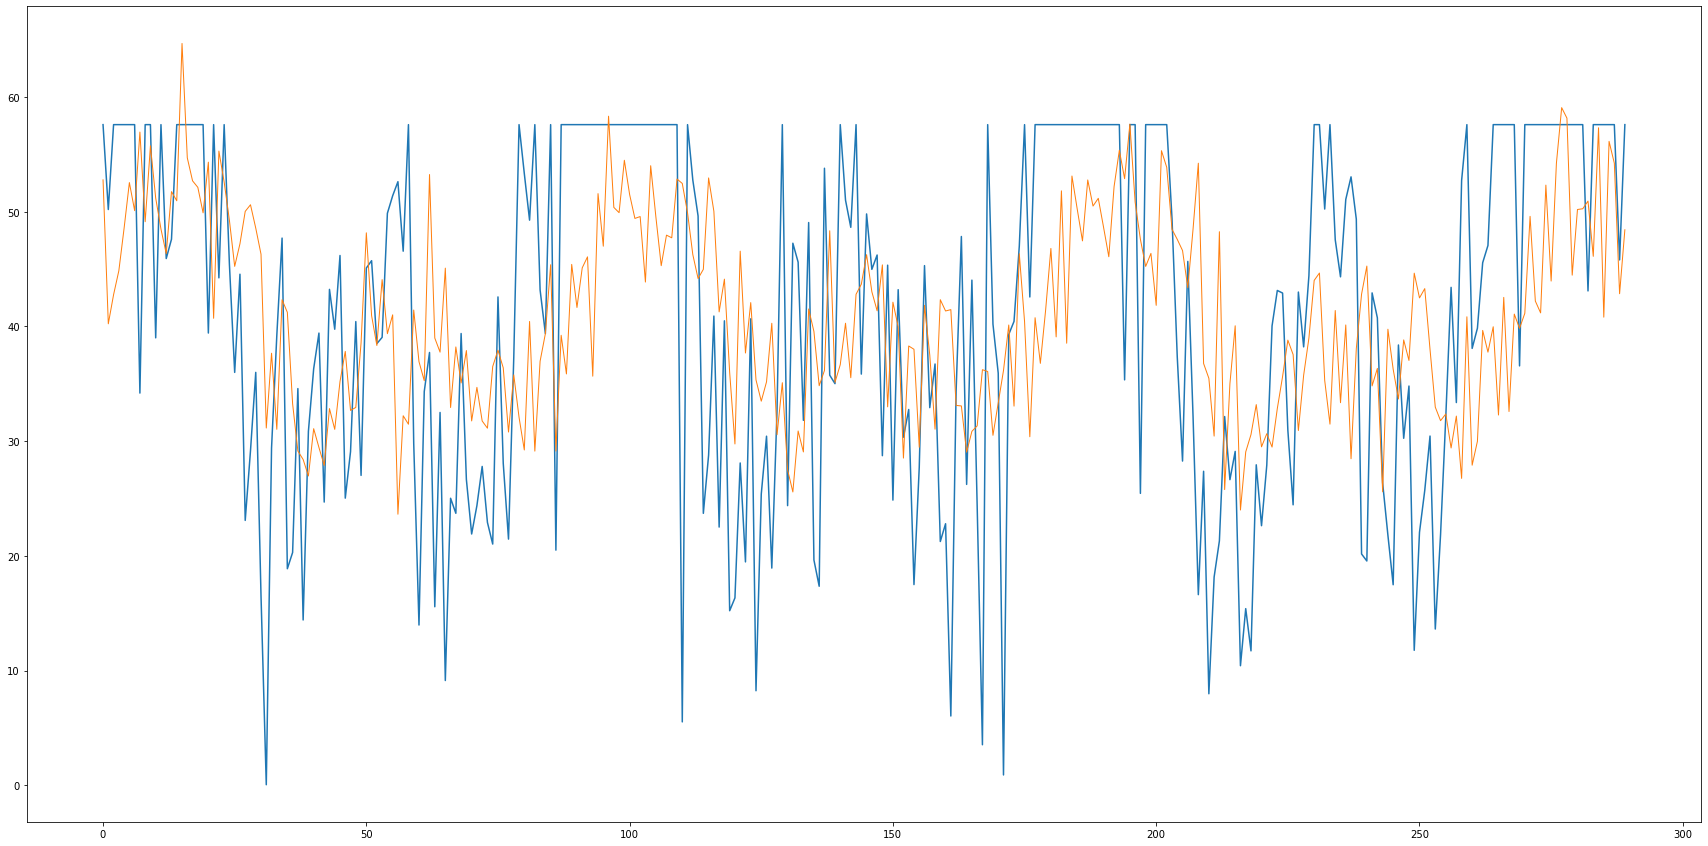

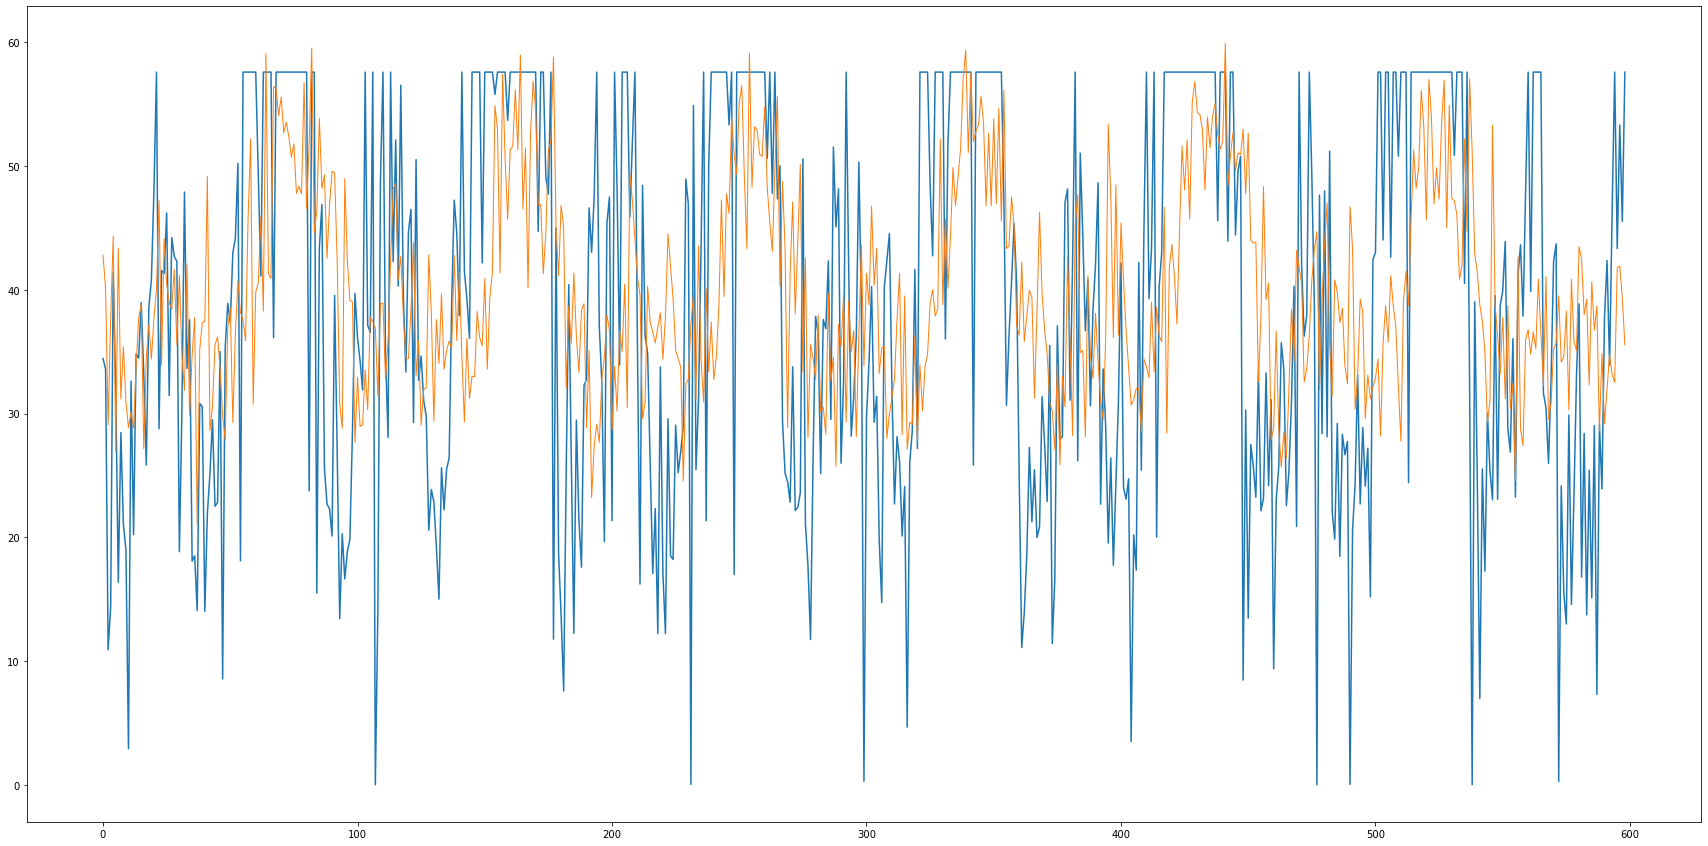

Epoch 1/200
436/436 [==============================] - 20s 42ms/step - loss: 197.2240 - val_loss: 137.7277
Epoch 2/200
436/436 [==============================] - 18s 42ms/step - loss: 136.9602 - val_loss: 161.0531
Epoch 3/200
436/436 [==============================] - 18s 42ms/step - loss: 133.9452 - val_loss: 131.0840
Epoch 4/200
436/436 [==============================] - 19s 45ms/step - loss: 128.7360 - val_loss: 121.7018
Epoch 5/200
436/436 [==============================] - 19s 43ms/step - loss: 124.8194 - val_loss: 125.2623
Epoch 6/200
436/436 [==============================] - 20s 46ms/step - loss: 126.4855 - val_loss: 121.1763
Epoch 7/200
436/436 [==============================] - 19s 43ms/step - loss: 123.3240 - val_loss: 123.9073
Epoch 8/200
436/436 [==============================] - 18s 42ms/step - loss: 121.5813 - val_loss: 131.3938
Epoch 9/200
436/436 [==============================] - 19s 43ms/step - loss: 122.0934 - val_loss: 124.7202
Epoch 10/200
436/436 [===============

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mse = model.evaluate_generator(test_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valPredict = model.predict_generator(val_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, wh

lookback =  9 mse =  137.57850646972656


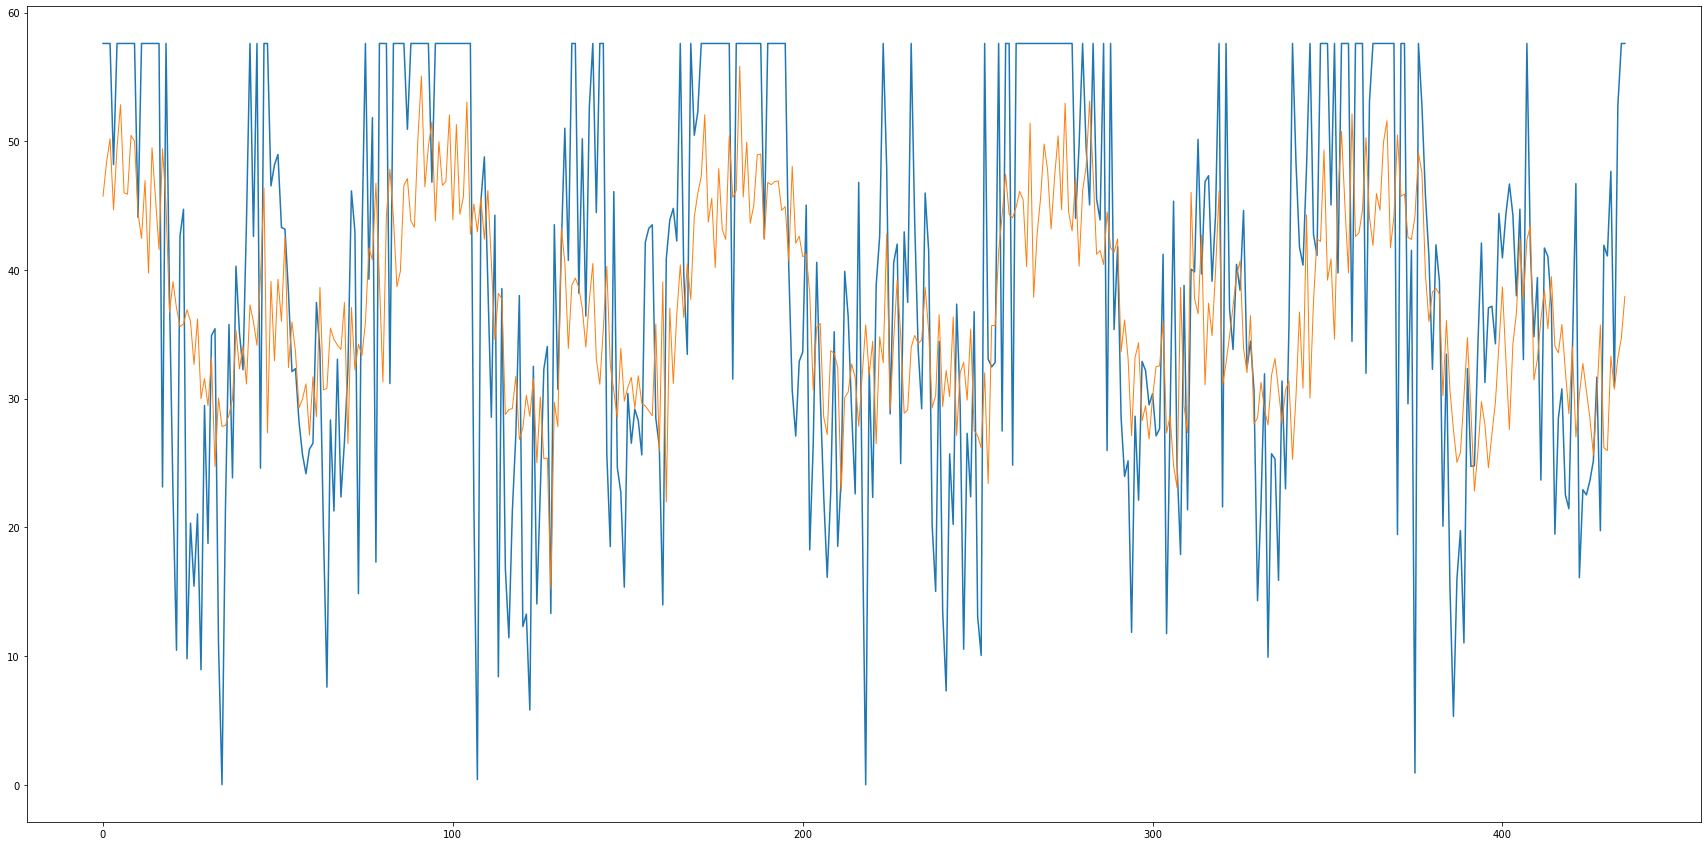

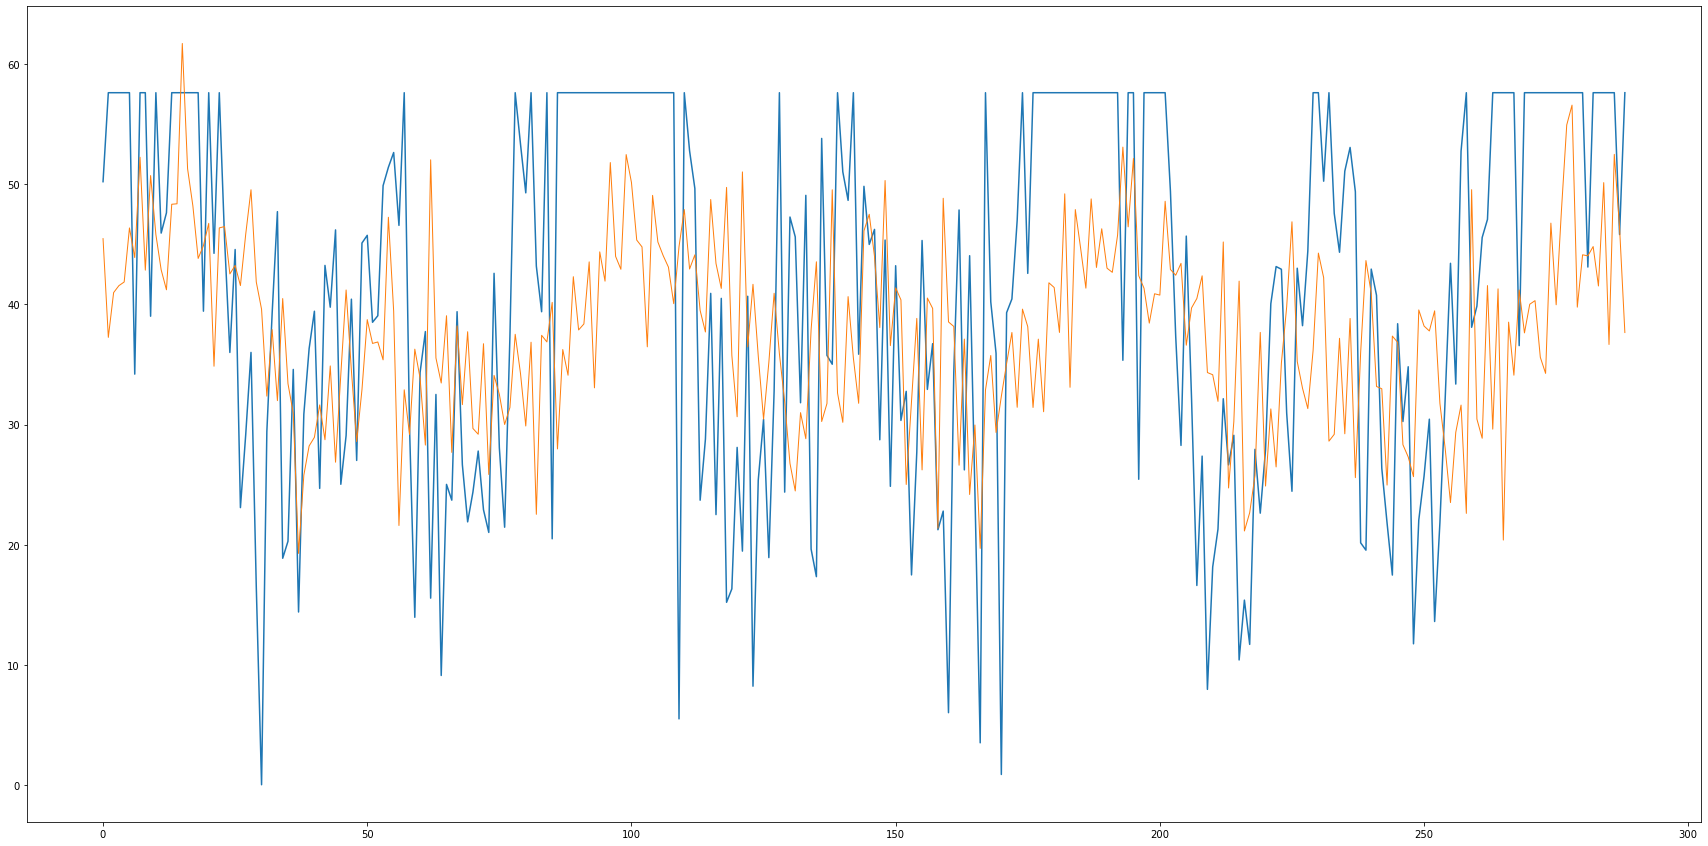

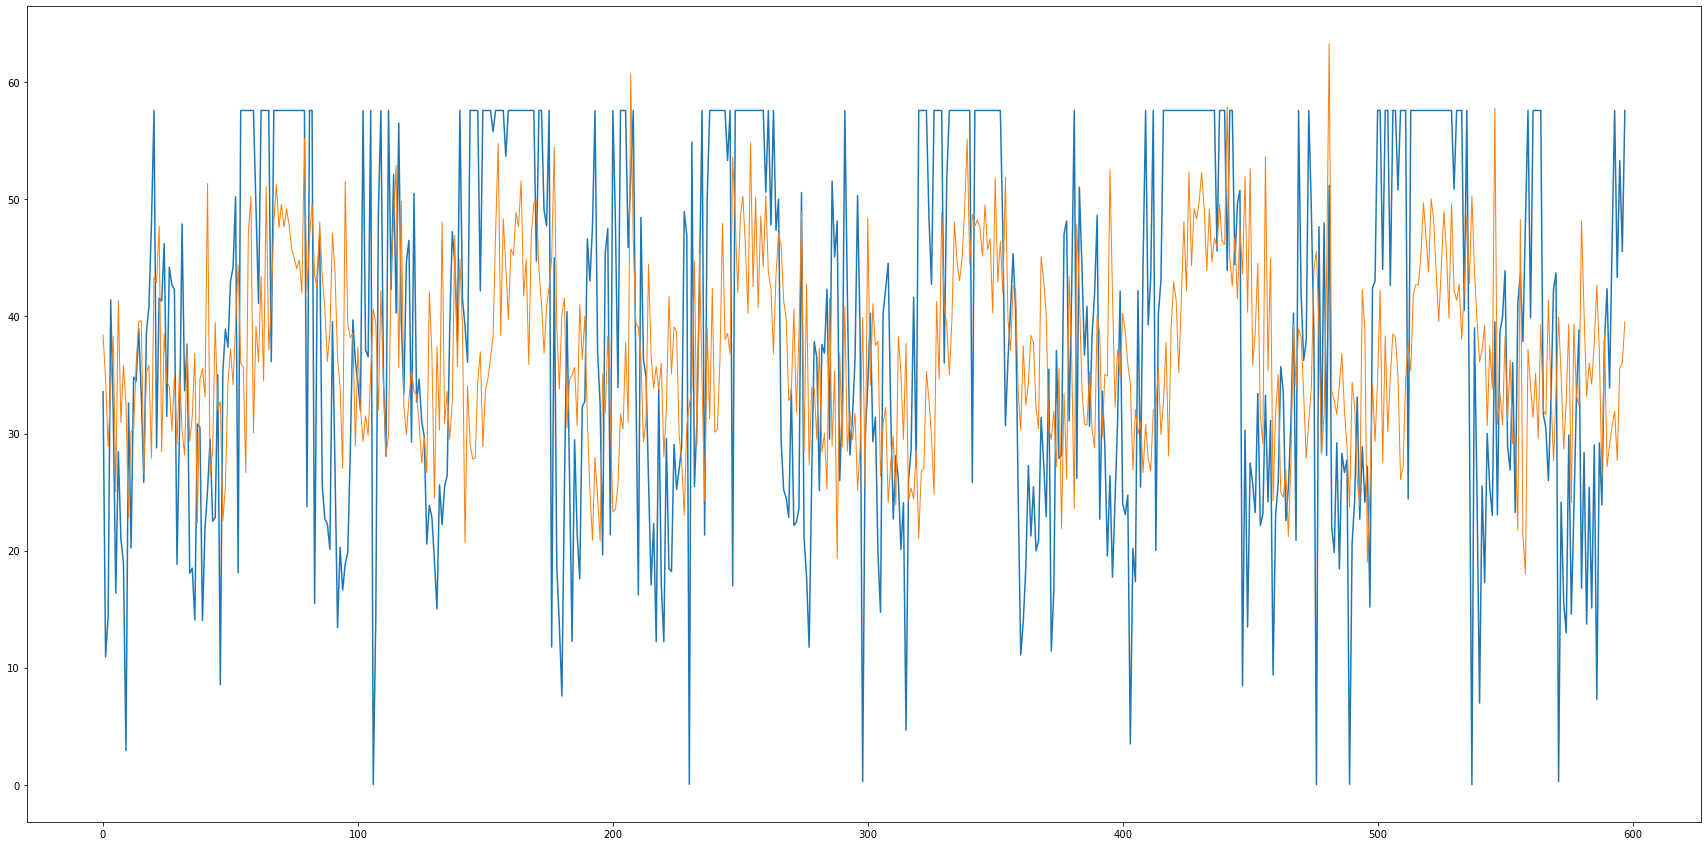

Epoch 1/200
435/435 [==============================] - 22s 47ms/step - loss: 199.3538 - val_loss: 135.3790
Epoch 2/200
435/435 [==============================] - 20s 45ms/step - loss: 142.1384 - val_loss: 135.5232
Epoch 3/200
435/435 [==============================] - 20s 46ms/step - loss: 136.5839 - val_loss: 130.3047
Epoch 4/200
435/435 [==============================] - 20s 46ms/step - loss: 131.2518 - val_loss: 124.6294
Epoch 5/200
435/435 [==============================] - 20s 47ms/step - loss: 131.2782 - val_loss: 126.7525
Epoch 6/200
435/435 [==============================] - 21s 48ms/step - loss: 129.3721 - val_loss: 123.6714
Epoch 7/200
435/435 [==============================] - 20s 47ms/step - loss: 126.7224 - val_loss: 123.0331
Epoch 8/200
435/435 [==============================] - 21s 49ms/step - loss: 125.2078 - val_loss: 140.0764
Epoch 9/200
435/435 [==============================] - 21s 47ms/step - loss: 123.5828 - val_loss: 126.9825
Epoch 10/200
435/435 [===============

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mse = model.evaluate_generator(test_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valPredict = model.predict_generator(val_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\505697565.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, wh

lookback =  10 mse =  153.66415405273438


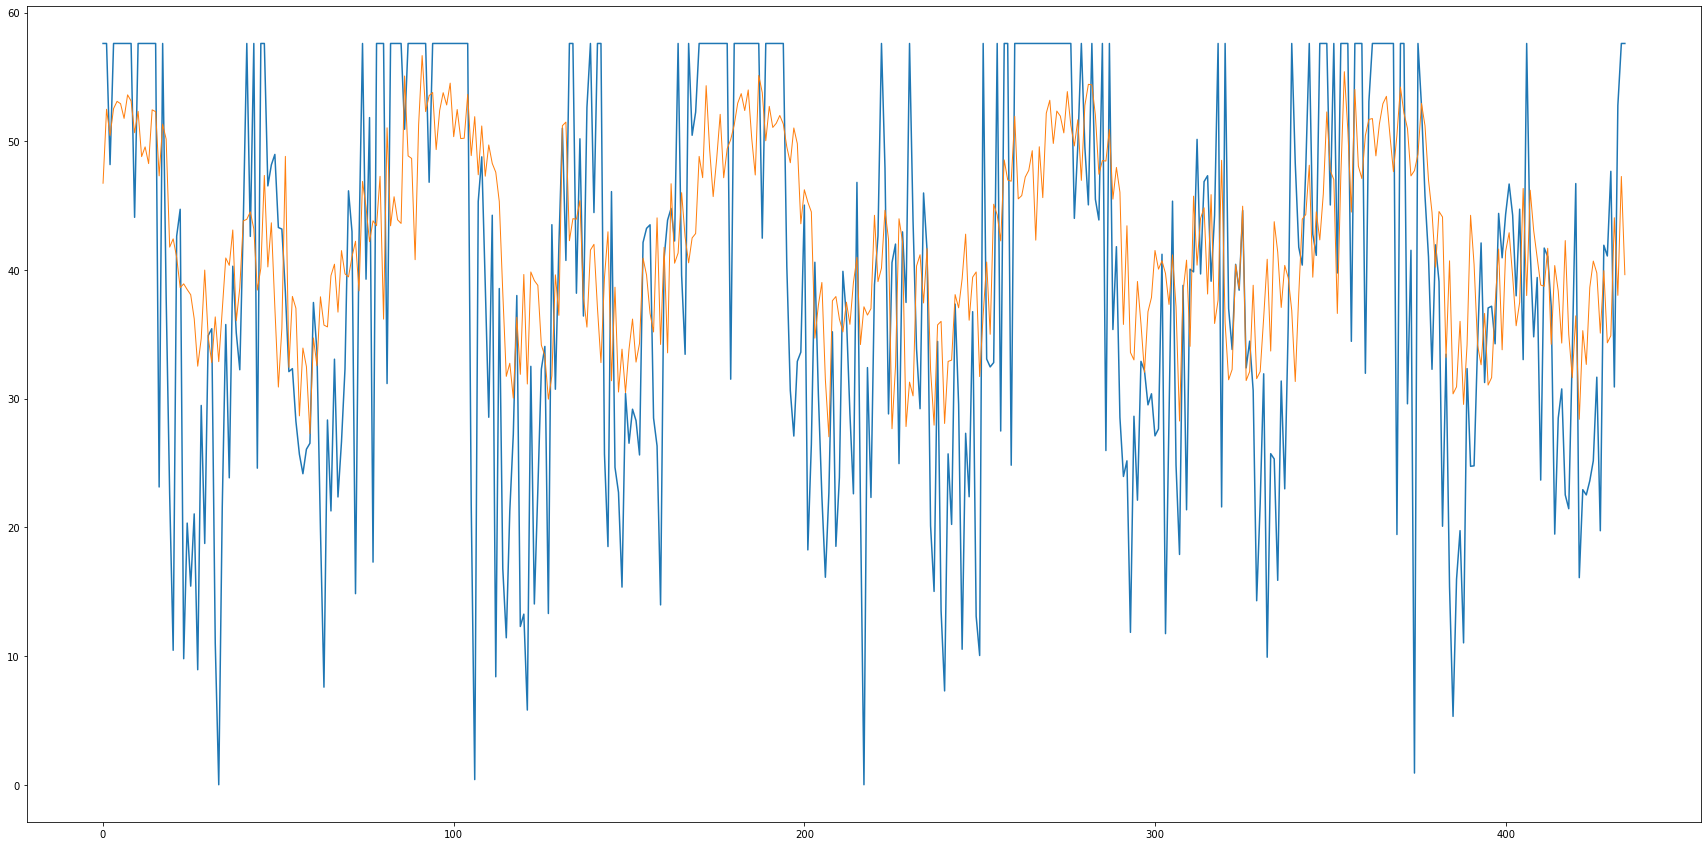

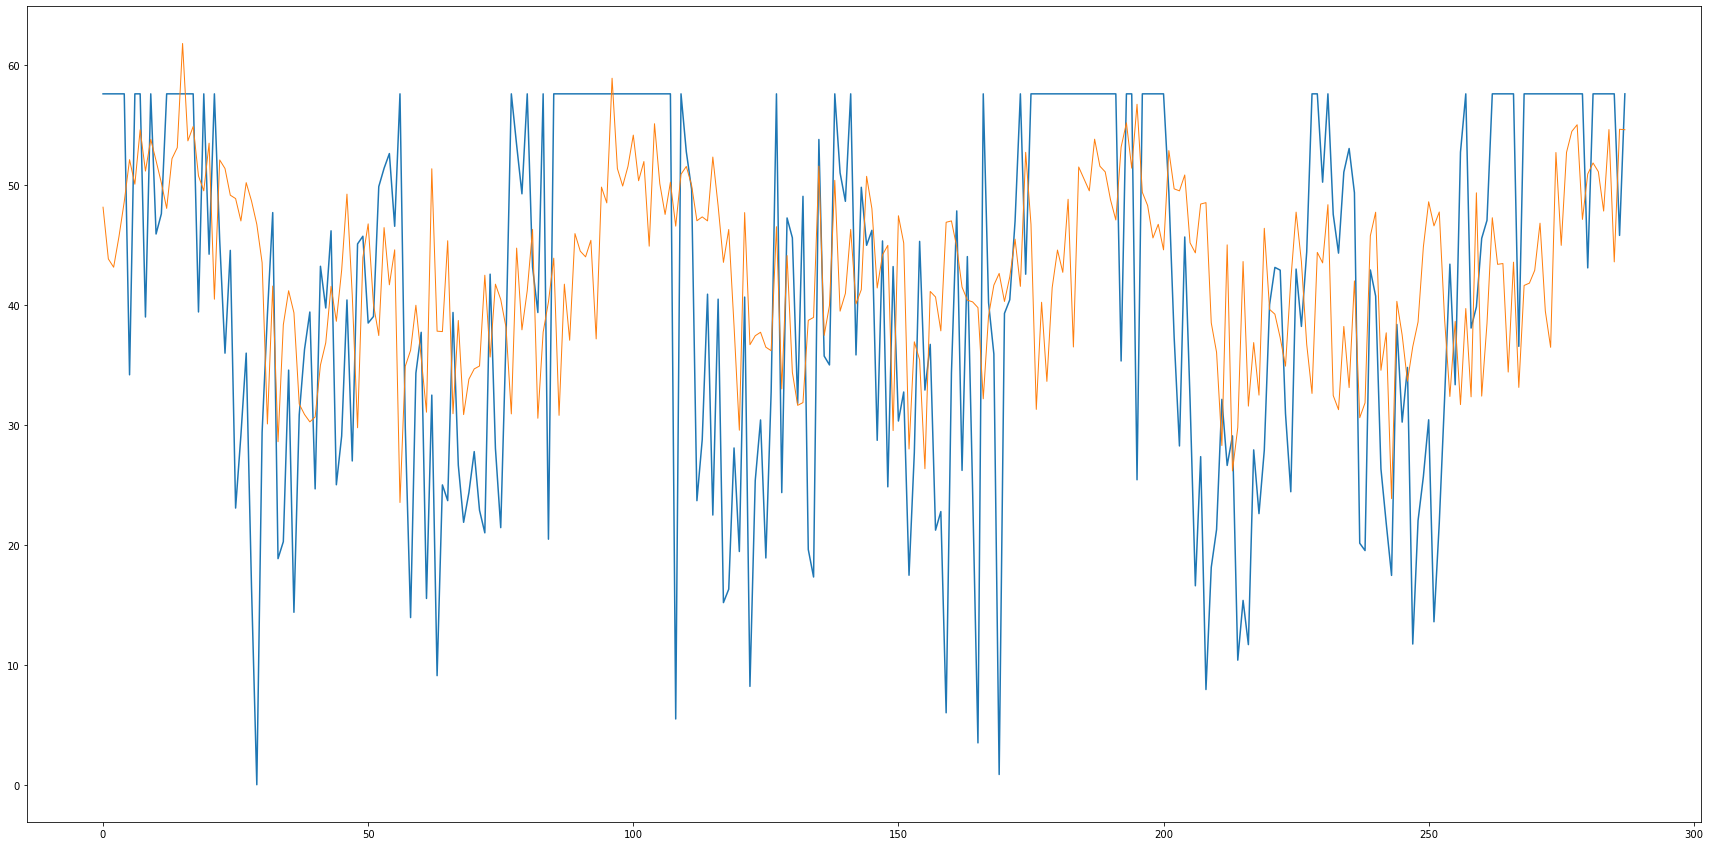

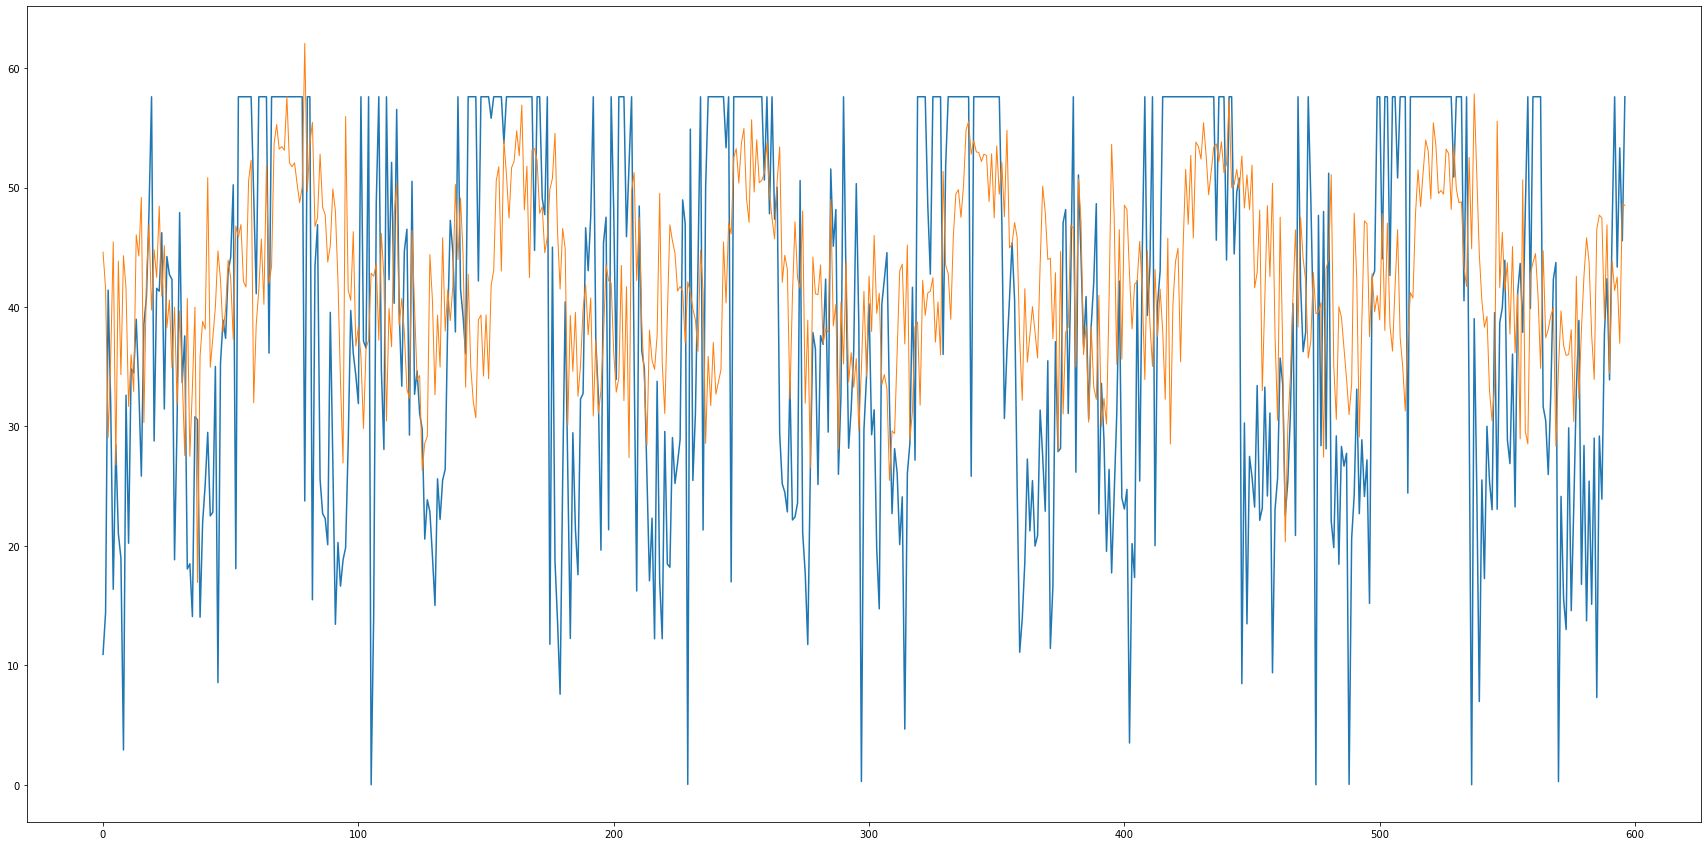

Epoch 1/200
434/434 [==============================] - 27s 57ms/step - loss: 247.0547 - val_loss: 141.9802
Epoch 2/200
434/434 [==============================] - 22s 51ms/step - loss: 147.7424 - val_loss: 139.2599
Epoch 3/200
434/434 [==============================] - 23s 54ms/step - loss: 138.6432 - val_loss: 134.7900
Epoch 4/200
434/434 [==============================] - 23s 53ms/step - loss: 134.9607 - val_loss: 133.1475
Epoch 5/200
434/434 [==============================] - 23s 52ms/step - loss: 133.8080 - val_loss: 131.1253
Epoch 6/200
434/434 [==============================] - 23s 52ms/step - loss: 133.6496 - val_loss: 127.6282
Epoch 7/200
434/434 [==============================] - 23s 53ms/step - loss: 132.4844 - val_loss: 130.4035
Epoch 8/200
434/434 [==============================] - 22s 51ms/step - loss: 128.7679 - val_loss: 129.1718
Epoch 9/200
434/434 [==============================] - 24s 55ms/step - loss: 129.2701 - val_loss: 123.7192
Epoch 10/200
434/434 [===============

In [ ]:
train,ds = train_test_split(filtered_df,0.33)
val,test = train_test_split(ds,0.33)
models, mse_values = train_model_lookback(6,60,train,val,test)

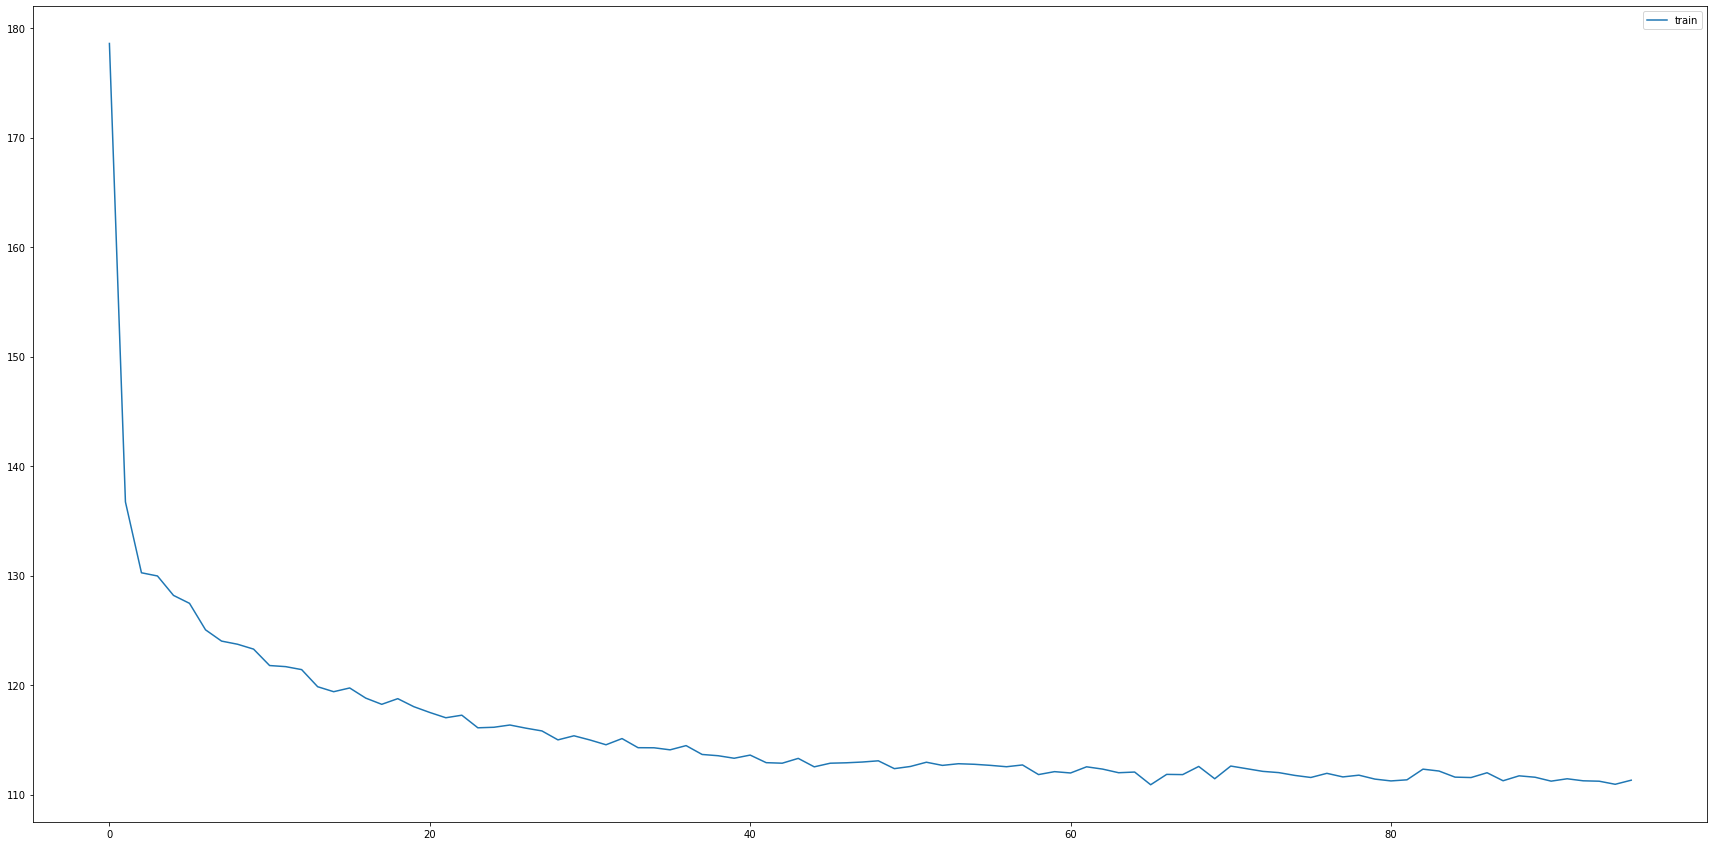

In [ ]:
# plot training history
plt.plot(model.history.history['loss'], label='train')
#plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [300]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [201]:
trainPredict

array([[[ 24.969778 ,  30.083658 ,  74.40128  , ...,  40.548733 ,
          34.45397  ,  56.904213 ],
        [ 42.193832 ,  16.989935 ,  96.2798   , ...,  55.046078 ,
          36.79815  ,  41.280464 ],
        [ 42.080975 ,  29.191475 ,  45.66792  , ...,  12.052427 ,
          34.67651  ,  21.38911  ],
        ...,
        [ 30.413353 ,  77.78176  ,  52.74436  , ...,  64.286156 ,
          72.72187  ,  48.74143  ],
        [ 66.844185 ,  74.69424  ,  40.708447 , ...,  37.65198  ,
          54.41923  ,  22.4632   ],
        [ 64.759674 ,  83.0636   ,  13.552444 , ...,  55.190197 ,
          51.48567  ,  53.425327 ]],

       [[ 23.319096 ,  37.92592  ,  86.034515 , ...,  47.422935 ,
          42.789318 ,  64.13244  ],
        [ 46.508858 ,   6.41066  ,  93.3337   , ...,  53.458786 ,
          32.249874 ,  33.10449  ],
        [ 66.41519  ,  37.37523  ,  53.18892  , ...,  47.41222  ,
          35.818523 ,  52.95364  ],
        ...,
        [ 35.979427 ,  58.90729  ,  78.7956   , ...,  

In [301]:
model.evaluate_generator(test_data_gen)

C:\Users\Almodather\AppData\Local\Temp\ipykernel_3880\2210199054.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)


123.317138671875

In [302]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    

In [303]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    

In [152]:
# train_predictions = trainPredict.reshape(len(trainPredict),trainPredict.shape[-1])
# test_predictions = testPredict.reshape(len(testPredict),testPredict.shape[-1])

In [325]:
test_predictions

[37.619522,
 40.67589,
 37.825928,
 33.527374,
 37.797523,
 31.496223,
 41.344826,
 42.0338,
 44.537937,
 37.09161,
 37.735424,
 36.38559,
 35.00614,
 33.188667,
 36.27326,
 35.88271,
 36.424805,
 44.38687,
 39.753002,
 29.104567,
 35.27539,
 39.762444,
 40.046646,
 39.484554,
 38.190742,
 35.83906,
 41.50742,
 32.99485,
 41.89546,
 41.41117,
 39.97661,
 32.70009,
 38.88649,
 37.701057,
 36.90738,
 35.802887,
 31.914179,
 39.979767,
 37.502254,
 34.50908,
 38.109444,
 39.120995,
 50.08022,
 44.54986,
 42.752583,
 48.928993,
 51.992573,
 49.833076,
 53.497932,
 49.63924,
 49.42984,
 46.790558,
 47.491756,
 50.76256,
 47.619305,
 48.452583,
 47.65059,
 51.425964,
 48.044212,
 50.881393,
 51.956665,
 45.68581,
 47.137592,
 48.10374,
 47.98528,
 49.98779,
 39.32302,
 44.396194,
 40.525265,
 40.67968,
 47.3073,
 45.69898,
 37.92963,
 44.298157,
 33.69355,
 38.9642,
 31.062962,
 36.72771,
 37.883286,
 38.11171,
 39.587433,
 33.814667,
 39.359417,
 37.928062,
 42.762497,
 35.96246,
 36.668663

In [329]:
len(testPredict[0,0,:])

85

In [107]:
test_predictions[1][:]

array([55.606014, 58.780724, 56.101803, 63.722164, 57.902466, 56.99357 ,
       62.25744 , 61.767895, 64.139725, 56.123833, 60.612453, 62.003616,
       64.476776, 62.636395, 60.97629 , 60.44707 , 68.89125 , 51.372257,
       62.033062, 55.562176, 54.961407, 67.77901 , 60.807182, 66.372375,
       59.242584, 54.877094, 62.458763, 44.57238 , 35.335682, 58.568768,
       52.372726, 60.31138 , 65.86974 , 66.26572 , 61.3123  , 65.24631 ,
       61.844315, 64.0413  , 59.122913, 65.449875, 48.092915, 62.31041 ,
       62.52581 , 60.8608  , 65.24241 , 60.310825, 60.196564, 58.750675,
       50.01792 , 60.537685, 52.632618, 56.766792, 60.274586, 38.624565,
       43.85912 , 59.03002 , 59.206097, 59.53653 , 62.528675, 61.765095,
       52.879753, 68.19045 , 70.8392  , 50.194202, 48.72488 , 48.699173,
       56.689926, 37.43252 , 50.848476, 70.682785, 51.518806, 57.18302 ,
       62.039925, 62.56058 , 42.826744, 61.29944 , 59.071495, 60.199097,
       61.761795, 64.111275, 33.46731 , 37.006584, 

In [94]:
train_predictions

[39.017586,
 45.81272,
 42.70567,
 43.602478,
 45.143097,
 47.316177,
 40.815277,
 43.49227,
 43.1327,
 42.343327,
 40.333412,
 40.042747,
 40.756893,
 39.100224,
 41.632183,
 42.379967,
 37.39764,
 43.589222,
 42.525448,
 42.96097,
 35.005093,
 36.633102,
 38.029793,
 33.95596,
 40.975986,
 37.560604,
 34.423325,
 42.28786,
 42.171352,
 31.449656,
 29.263014,
 47.098625,
 48.685646,
 43.91059,
 48.029106,
 50.454712,
 45.058323,
 48.106544,
 45.7496,
 47.18997,
 51.21795,
 46.152172,
 46.82976,
 44.749935,
 46.038666,
 41.945866,
 48.097187,
 42.94861,
 38.969772,
 40.506413,
 29.35144,
 32.743755,
 43.899773,
 28.29339,
 31.383797,
 30.660397,
 33.375874,
 31.276182,
 39.351345,
 34.646816,
 38.550655,
 41.178528,
 39.926716,
 37.47113,
 45.27669,
 40.421703,
 48.66073,
 53.9312,
 45.75338,
 50.026005,
 42.338367,
 45.411514,
 51.08054,
 50.80514,
 55.48254,
 39.872036,
 48.60413,
 52.11171,
 36.54754,
 48.324677,
 37.88854,
 49.30077,
 37.937546,
 47.920113,
 39.731857,
 39.358566,


In [380]:
# preds = np.concatenate((df[:lookback],true_predictionsTr, df[train_size:train_size+lookback], true_predictionsTs), axis=0)

In [116]:
len(train_predictions)

520

In [117]:
(train.shape)

(540, 85)

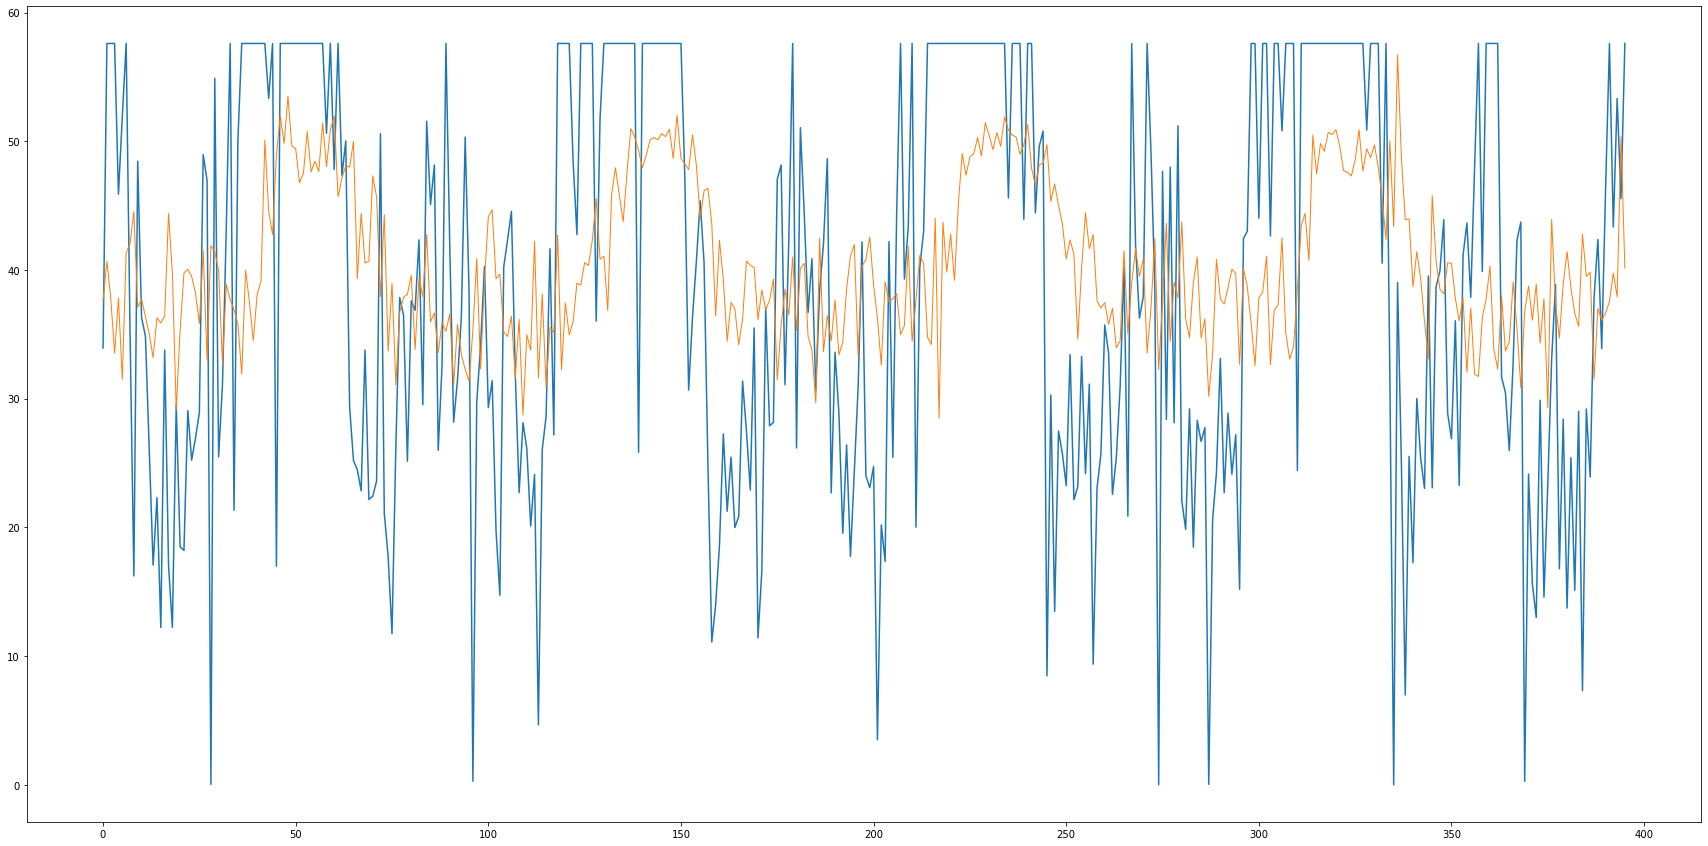

In [304]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smoothed_df[0],lw=1)
plt.plot(test.values[10:,0])
plt.plot(test_predictions,lw=1)
#plt.legend(['actual data','Predicted data'],loc='best')
# plt.xlim([0, 700])
plt.show()

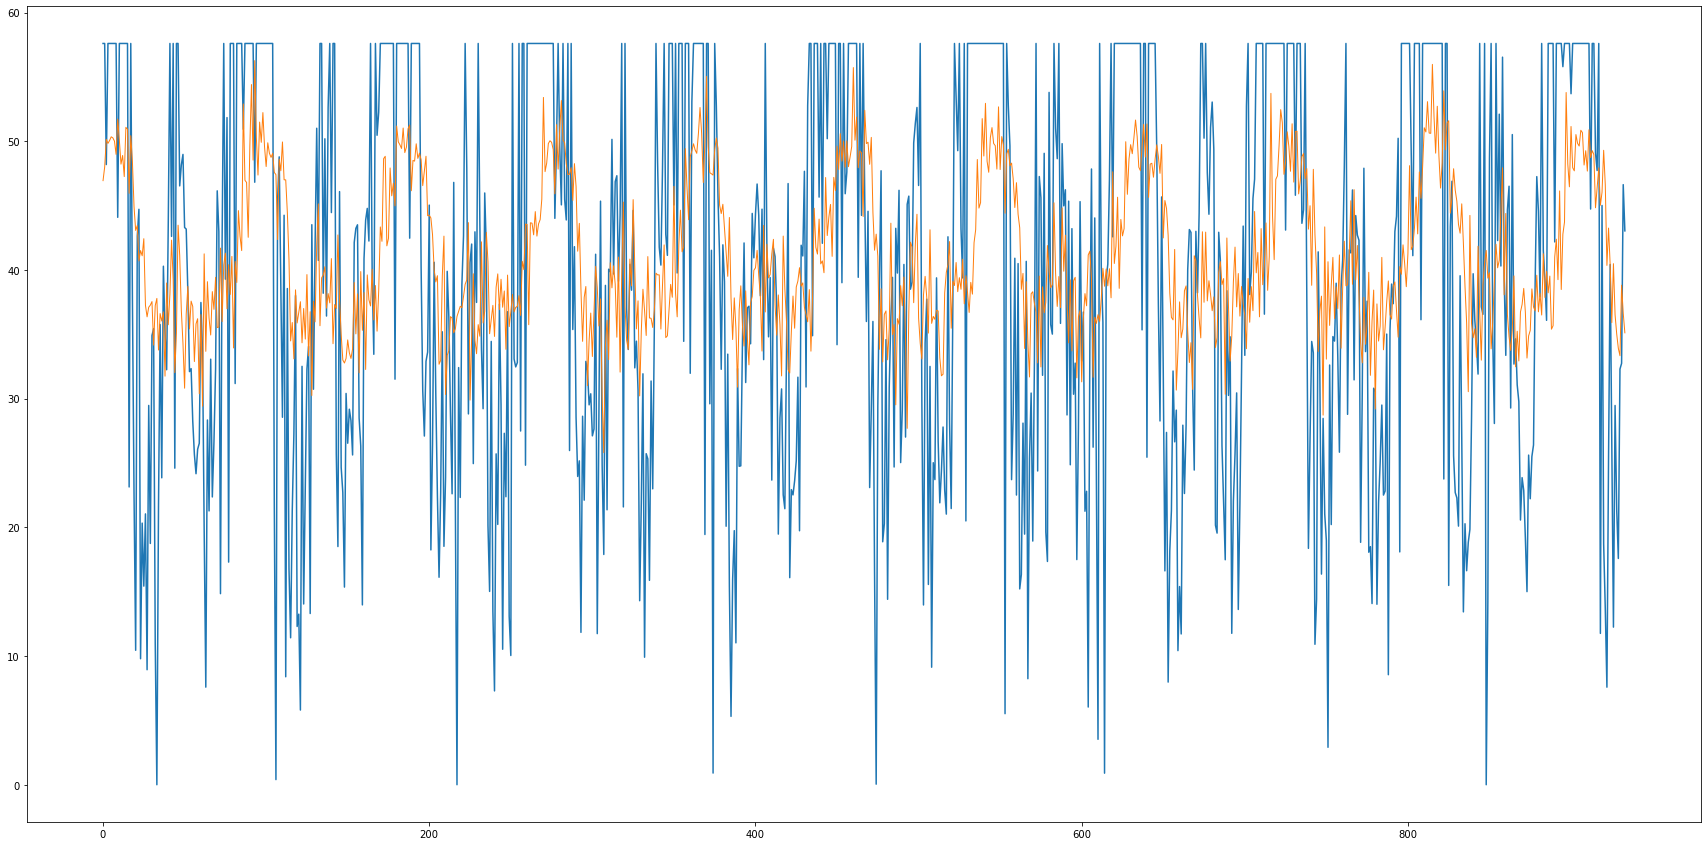

In [306]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smoothed_df[0],lw=1)
plt.plot(train.values[10:,0])
plt.plot(train_predictions,lw=1)
#plt.legend(['actual data','Predicted data'],loc='best')
# plt.xlim([0, 400])
plt.show()


In [176]:
model.save("LSTMMultiEdges.h5")

## Prediction on the average city speed -unfinished

In [5]:
df = ds.drop(['coord','gpscoord','lane'],1)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\1701734751.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = ds.drop(['coord','gpscoord','lane'],1)


In [6]:
df = df.resample('3min').mean()
df

spdK/m  displacement   turnAngle      vehDen
dateandtime                                                         
2023-02-17 00:00:00  58.992090   2237.262857  196.483892   57.916256
2023-02-17 00:03:00  55.791728   1622.110226  205.790827   40.293233
2023-02-17 00:06:00  60.170339   1577.768110  178.990472   42.401575
2023-02-17 00:09:00  60.403732   1698.545423  213.101408   47.422535
2023-02-17 00:12:00  58.263913   1704.683490  201.942685   49.953020
...                        ...           ...         ...         ...
2023-02-17 23:45:00  59.454828   1832.952150  202.986542  107.523364
2023-02-17 23:48:00  59.053985   1795.112621  213.928220  103.077670
2023-02-17 23:51:00  52.242362   1850.092345  195.741552   97.234483
2023-02-17 23:54:00  51.196018   1822.018401  200.623323  106.799373
2023-02-17 23:57:00  55.394599   1882.953951  213.380031  108.487654

[480 rows x 4 columns]

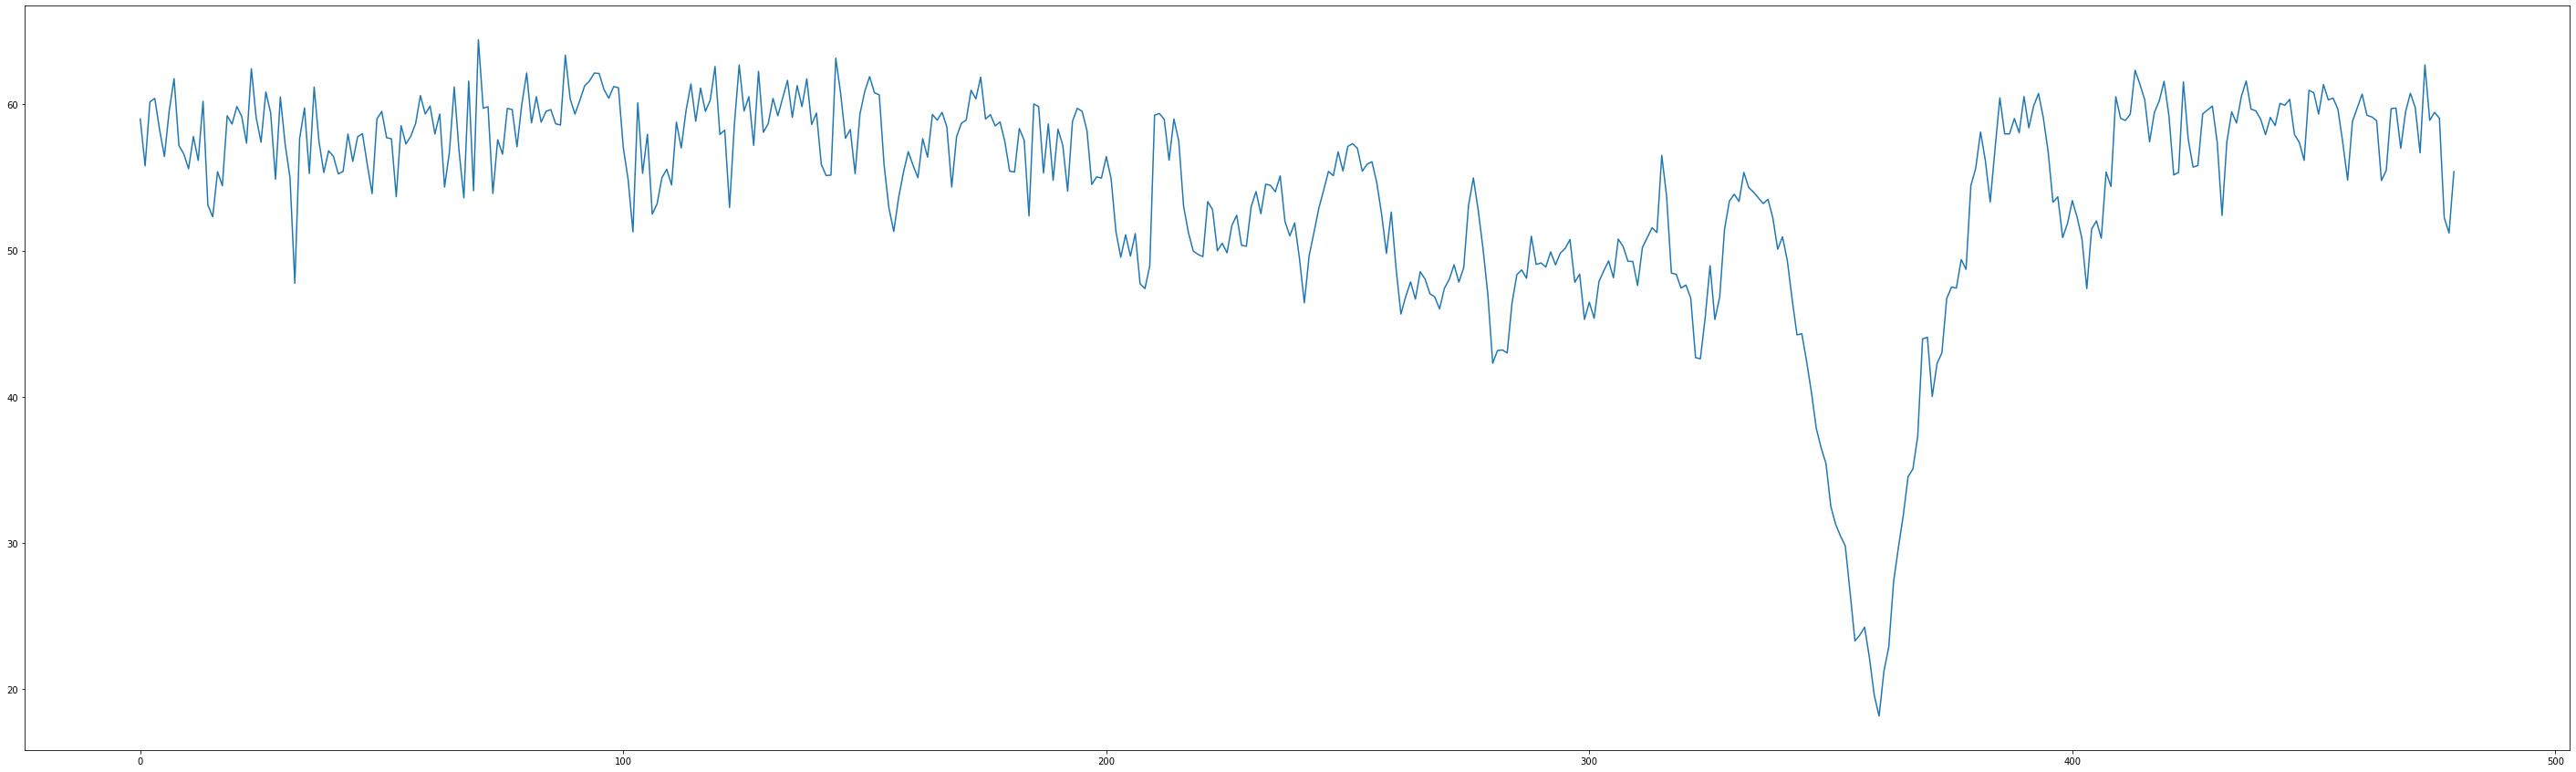

In [7]:
values = df.values
plt.rcParams["figure.figsize"] = (50,15)
plt.plot(values[:, 0])


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train  = df[0:train_size]
test   = df[train_size:]

In [10]:
scaler = MinMaxScaler()

train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])


In [11]:
trainY = train['spdK/m']
testY  = test['spdK/m']

trainX = train.drop(['spdK/m'],1)
testX = test.drop(['spdK/m'],1)
trainX

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainX = train.drop(['spdK/m'],1)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testX = test.drop(['spdK/m'],1)


displacement   turnAngle      vehDen
dateandtime                                              
2023-02-17 00:00:00   2237.262857  196.483892   57.916256
2023-02-17 00:03:00   1622.110226  205.790827   40.293233
2023-02-17 00:06:00   1577.768110  178.990472   42.401575
2023-02-17 00:09:00   1698.545423  213.101408   47.422535
2023-02-17 00:12:00   1704.683490  201.942685   49.953020
...                           ...         ...         ...
2023-02-17 18:57:00   1786.411093  197.825471  421.631829
2023-02-17 19:00:00   2023.805194  197.219635  429.465839
2023-02-17 19:03:00   1967.196782  191.184425  403.011580
2023-02-17 19:06:00   2074.263958  198.069887  385.130208
2023-02-17 19:09:00   1921.063419  199.318191  352.092803

[384 rows x 3 columns]

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [13]:
# How many record to take into account
lookback = 5 #15mins
n_features = df.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(trainX, trainY,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(testX, testY,
                                    length=lookback, 
                                    batch_size=batch_size)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(200, return_sequences=True, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(100, return_sequences=False, activation='sigmoid', input_shape=(None, trainX.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10800     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [95]:
# fit model
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model.fit(generator,epochs=200, callbacks = es)

Epoch 1/200
379/379 [==============================] - 3s 2ms/step - loss: 7078.7109
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 1227.3009
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 438.4662
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 3576.5002
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 1018.1528
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 737.1349
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 192.8212
Epoch 8/200
379/379 [==============================] - 1s 2ms/step - loss: 456.0615
Epoch 9/200
379/379 [==============================] - 1s 2ms/step - loss: 273.7569
Epoch 10/200
379/379 [==============================] - 1s 2ms/step - loss: 432.7608
Epoch 11/200
379/379 [==============================] - 1s 2ms/step - loss: 198.0078
Epoch 12/200
379/379 [==============================] - 1s 2ms/step - 

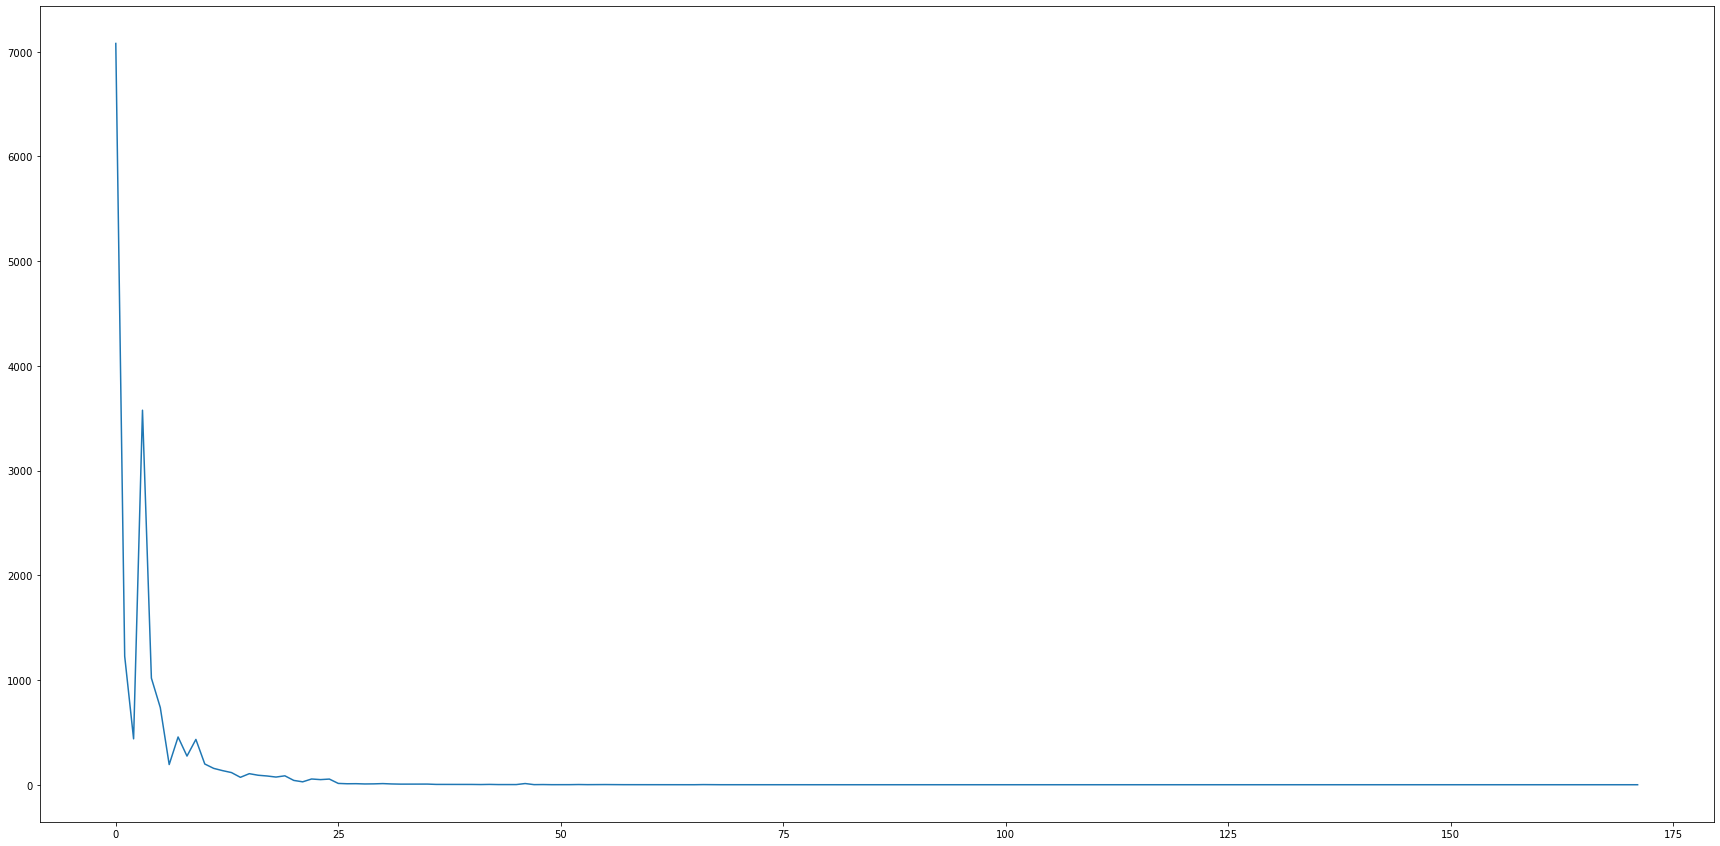

In [96]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [97]:
from tensorflow.keras.models import load_model


In [98]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [99]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 


In [100]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    


In [101]:
#true_predictionsTr = scaler.inverse_transform(test_predictions)
#true_predictionsTs = scaler.inverse_transform(train_predictions)


In [102]:
preds = np.concatenate((true_predictionsTs, true_predictionsTr), axis=0)


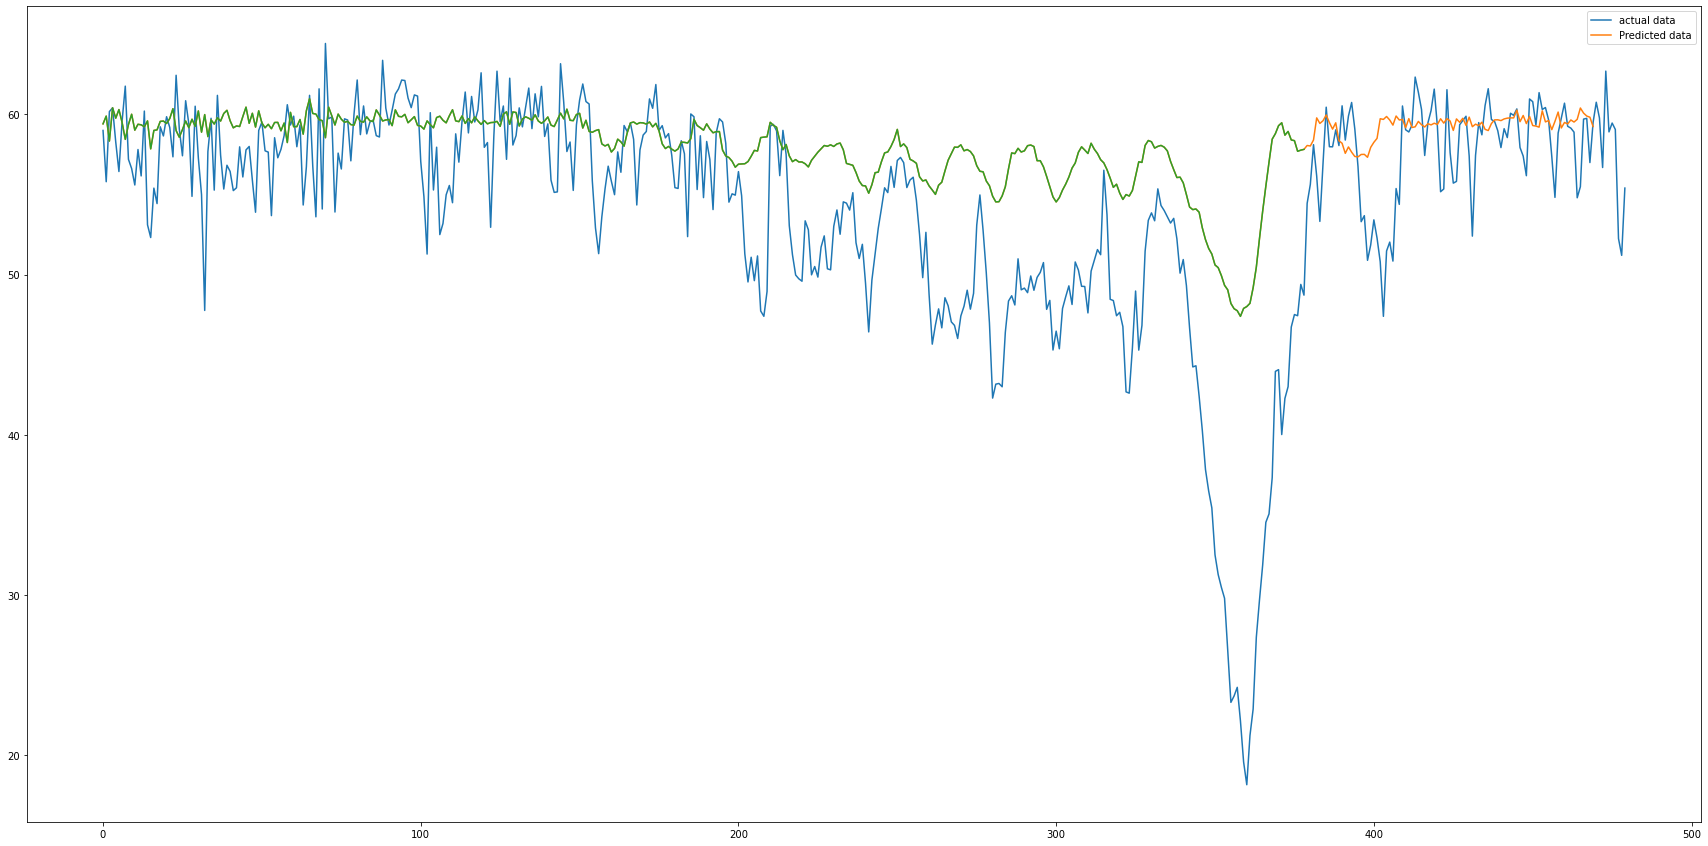

In [92]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(values[:, 0])
plt.plot(preds)
plt.plot(true_predictionsTs)
plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [262]:
model.save("steepVanillaLSTM3min.h5")